<font size="10">**ML supervisionato nel rischio di credito**</font><br>

> (c) 2026 Antonio Piemontese

**In questo notebook vedremo un PRIMO semplice esempio di applicazione di una rete neurale ad un problema di rischio di credito. Vedremo la PREPARAZIONE del dataset e tutte le problematiche ad essa connesse.**

# Passi preliminari

## Reset output
E' prudente, come passo 0 di tutti i notebook appena aperti, **cancellare gli eventuali output delle celle, sia di codice che markdown** (relative ad esecuzioni precedenti), perchè possono risultare fuorvianti e non attuali, in questo modo (da menù in alto di Google Colab): `Modifica (Edit)` --> `Cancella tutti gli outputs (Clear all output)` al fondo.

## La rilevazione dell'ambiente
**Il presente notebook funziona sia in Jupyter Notebook che Google Colab**.
A questo scopo, per garantire la compatibilità di alcune celle di codice con entrambi gli ambienti indicati, **rileviamo l'ambiente di esecuzione del notebook** (Jupyter oppure Google Colab): la seguente cella imposta una **variabile booleana `IN_COLAB`** che sarà poi **testata** da alcune celle del notebook (in particolare quelle di visualizzazione di immagini e PDF) per personalizzarne il comportamento a seconda dell'ambiente di esecuzione dell'ambiente rilevato.

In [ ]:
# impostazione del TOGGLE BINARIO:
try:
    import google.colab                      # package disponibile SOLO in Google Colab
                                             # Imports the Google Colab module, which provides Colab-specific functionality
                                             # for the notebook environment.
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

print("Running on Colab:", IN_COLAB)


# IMPORT dei package necessari (necessari sia in JN, VSC che in Colab):
from IPython.display import Image, display   # import dei package di incorporamento e visualizzazione immagine (una tantum)
                                             # Image e display sono entrambi necessari a Jupyter Notebook
                                             # Google Colab utilizza solo Image
import os                                    # necessario a Google Colab per vedere da una cella codice
                                             # i contenuti del 'content'

Running on Colab: False


## Installazione dei package necessari al notebook
Sono elencati nella seguente lista `REQUIRED_PACKAGES`:

In [6]:
# Lista dei package da verificare/installare
REQUIRED_PACKAGES = [
    "numpy",
    "pandas",
    "matplotlib",
    "scikit-learn",
    "seaborn",
    "statsmodels"
]



La seguente cella verifica che tutti i package contenuti nella lista `REQUIRED_PACKAGES` siano installati; se non lo sono, li installa.

In [7]:
import subprocess
import sys

def pip_has(pkg):
    result = subprocess.run(
        [sys.executable, "-m", "pip", "show", pkg],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    return result.returncode == 0

def install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

for pkg in REQUIRED_PACKAGES:
    if pip_has(pkg):
        print(f"{pkg} già installato.")
    else:
        print(f"{pkg} NON installato. Installazione...")
        install(pkg)

print("\nVerifica completata.")





numpy già installato.
pandas già installato.
matplotlib già installato.
scikit-learn già installato.
seaborn già installato.
statsmodels già installato.

Verifica completata.


---
> Attenzione all'installazione e nome di `scikit-learn`: il nome pip e il nome di import non coincidono!
> * nome di <u>installazione</u>: ***scikit-learn***
> * nome da <u>importare</u>: ***sklearn***

---

Diversi modi per verificare l'installazione di *scikit-learn*:

In [ ]:
!python -c "import sklearn; print(sklearn.__version__)"

1.6.1


Verificare l'installazione di `scikit-learn`, non di `sklearn`, con il seguente comando. E' il modo più sicuro:

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.3
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.2.2.0.48.1
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.18.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.33.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==4.0.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==7.0.0
catalogue==2.0.10
certifi==2026.1.4
cffi

Se avete installato i package con *conda*, allora occorre fare la verifica in questo modo (non funziona in Colab):

In [ ]:
if IN_COLAB is False:
  !conda list

## Import dei package

In [4]:
import pandas as pd                                                          # gestione dataframe
import numpy as np                                                           # gestione array numeriche
from sklearn.model_selection import train_test_split                         # suddivisione del datatset in training e test
import statsmodels.api as sm                                                 # un'altra libreria python per il Machine Learning, complementare a scikit-learn
from statsmodels.stats.outliers_influence import variance_inflation_factor   # il modulo per il calcolo del VIF
from sklearn.preprocessing import StandardScaler                             # il modulo per la standardizzazione dei dati

## Caricamento di immagini e PDF in Google Colab

* `struttura_german_credit.png`
* `tipi_variabili.png`
* `EDA.png`
* `encoding_right.png`
* `Contesto_AI.png`
* `CNN.png`
* `Tipi_apprendimento.png`
* `struttura_german_credit.png`
* `tabella_vs_vettore.png`
* `segnale_vs_rumore.png`
* `fitting_lineare.png`
* `fitting_non_lineare.png`
* `spazio_parametri.png`
* `manifold.png`
* `tassonomia_algoritmi.png`
* `tassonomia_algoritmi_2.png`
* `tassonomia_algoritmi_3.png`
* `processo_ML.png`
* `bias_vs_varianza.png`
* `bias_varianza_tradeoff.png`
* `RMSE.png`
* `overfit_vs_underfit.png`
* `loss_function.png`
* `Series_vs_DataFrame.png`
* `data_partitioning.png`
* `3_dataset_DDoDS.png`
* `tipi_variabili.png`

**DOVE devono TROVARSI le immagini**? (per essere visualizzate dalle varie celle)

Con **VSC** e **Jupyter Notebook** devono trovarsi nella **stessa cartella del notebook** (il path è infatti relativo).<br>
👉 Con ***Google Colab*** devono essere **caricate nella directory *content* dello storage volatile della sessione**, in questo modo:
- fare click sull'icona *File* al fondo del menù laterale di sinistra (di Google Colab); per default, è mostrata la directory *content* della *session storage*, che è costituita da una serie di cartella (non solo *content*)
- fare click sull'icona *Upload to session storage* (non confondere con il bottone di *Upload* di Gemini) e quindi caricare l'immagine
- possono occorrere alcuni secondi prima che l'immagine risulti elencata (vedi la rotella di avanzamento caricamento a fondo finestra)
- verificare l'effettiva disponibilità dell'immagine nella *session storage* (in Google Colab) nel seguente modo:

Verifica delle immagini caricate in `/content`:

In [5]:
# comando solo per Google Colab
if IN_COLAB is True:
    print(os.listdir('/content'))      # la print è necessaria, altrimenti NON visualizza nulla.
                                       # la funzione 'os.listdir()' infatti restituisce una lista, che poi occorre
                                       # assegnare ad una variabile o passare ad una funzione!

['.config', 'sample_data']


Come caricare i file PDF (ed anche le immagini):

In [ ]:
if IN_COLAB:
  from google.colab import files
  uploaded = files.upload()  # si aprirà un prompt per caricare il PDF

Saving Decision Tree in Python using scikit-learn_ the complete guide with code _ Towards AI.pdf to Decision Tree in Python using scikit-learn_ the complete guide with code _ Towards AI.pdf


## Legenda delle icone
La lista delle icone (standard) usate nel notebook:<br>

👉 punto di attenzione, il "succo"<br>
📌 nota<br>
📦 punto elenco importante<br>
📊 dati/numeri<br>
🔹 punto elenco normale<br>
⭐ punto elenco importante<br>
✅ punto risolto, positivo<br>
❌ punto negativo, da evitare<br>
⚠️ attenzione, warning, allarme


# Scopo, termini e contesto

**Machine Learning = (letter.) Apprendimento automatico ("*machine*")**, cioè utilizzo di reti di algoritmi predittivi (tradizionali o reti neurali) per prevedere fenomeni aziendali o di mercato. <br>
L'algoritmo "apprende" da dati (*learning* = apprendimento) **TABELLARI** passati.<br>
E' oggettivo, perchè basato su dati passati LOCALI (alla singola azienda), a differenza delle forme di AI degli anni '90 (ad es. sistemi esperti, motori di regole), che erano basati su conoscenza inserita nel sistema da esperti di settore.<br>
Se l'algoritmo (di rete neurale) apprende da dati NON-strutturati (*unstructured data*)- come testo, immagini, audio, video, ecc - si parla di Deep Learning, letter. "apprendimento profondo".<br>
"Profondo" perchè realizzato tramite reti neurali "profonde" (*deep*), cioè composte da molti livelli (*layer*).<br>

Vediamo il **contesto generale** nel quale il Deep Learning si inserisce:

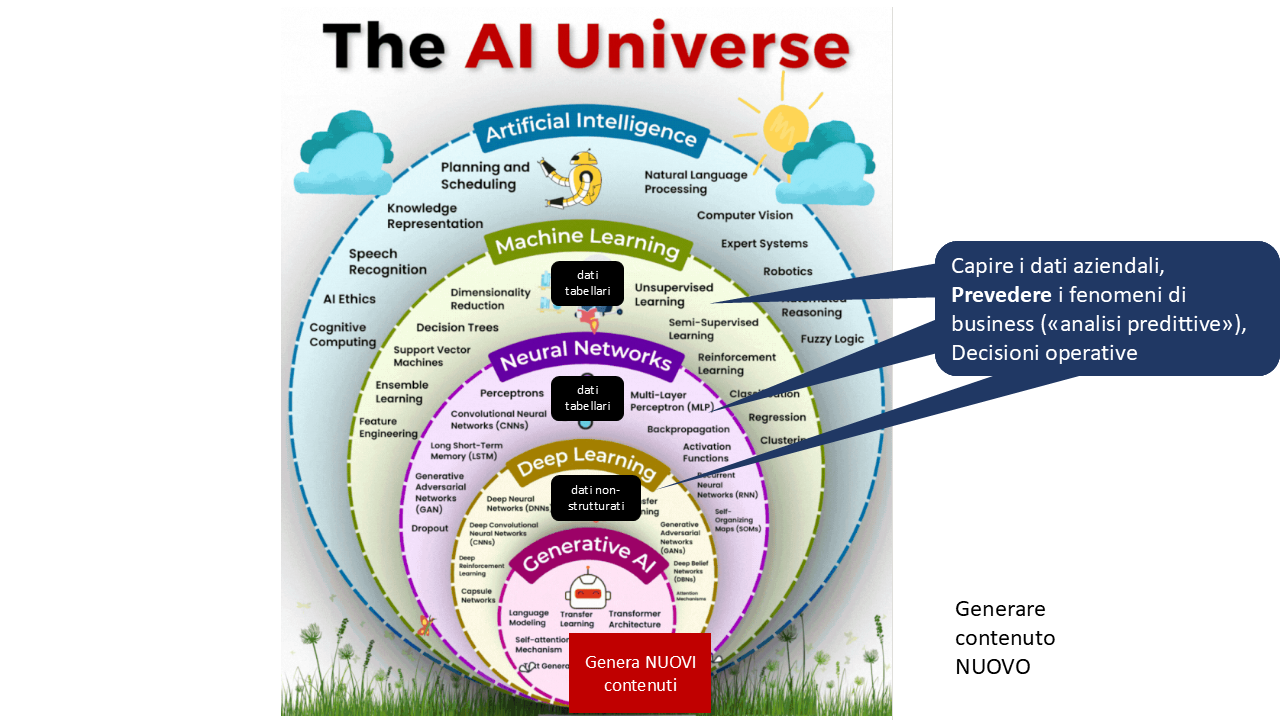

In [6]:
Image('Contesto_AI.png') if IN_COLAB else display(Image(filename='Contesto_AI.png'))

Di particolare importanza nel Deep Learning sono le [CNN (Convolutional Neural Network)](https://en.wikipedia.org/wiki/Convolutional_neural_network):

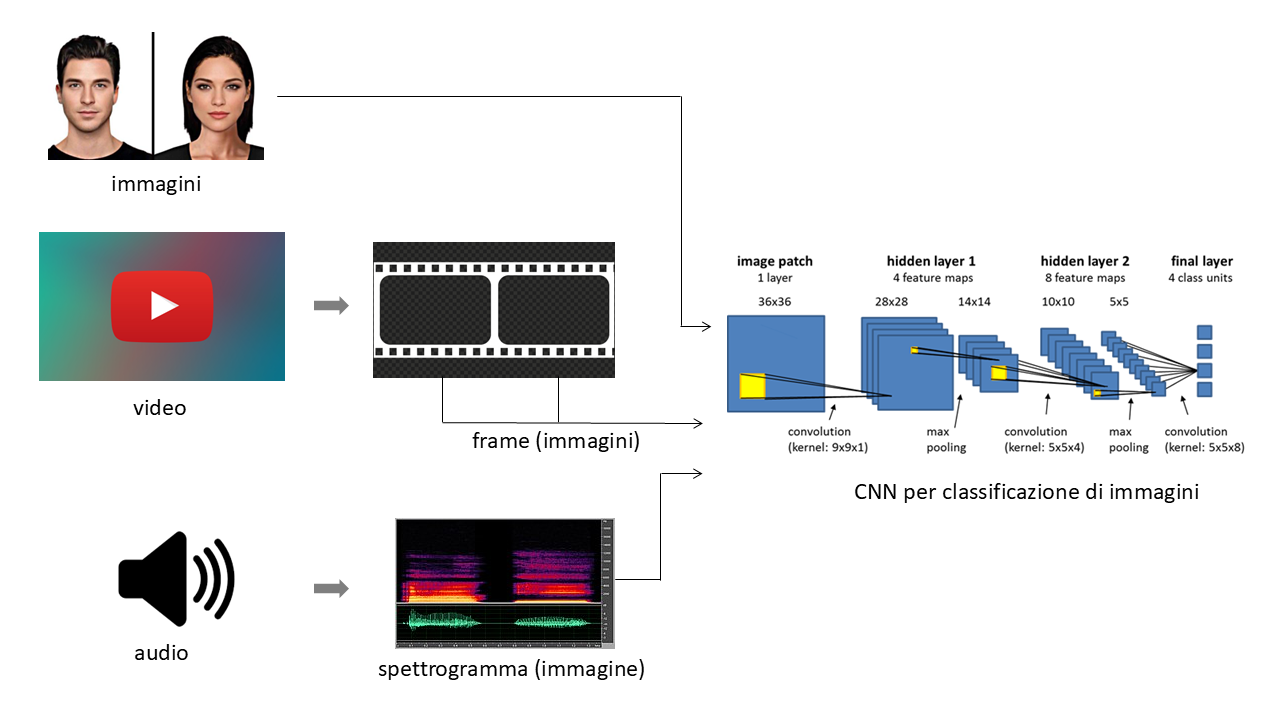

In [ ]:
Image('CNN.png') if IN_COLAB else display(Image(filename='CNN.png'))

Ecco una **tassonomia degli algoritmi di ML**, suddivisi per <u>tipo di apprendimento</u>:

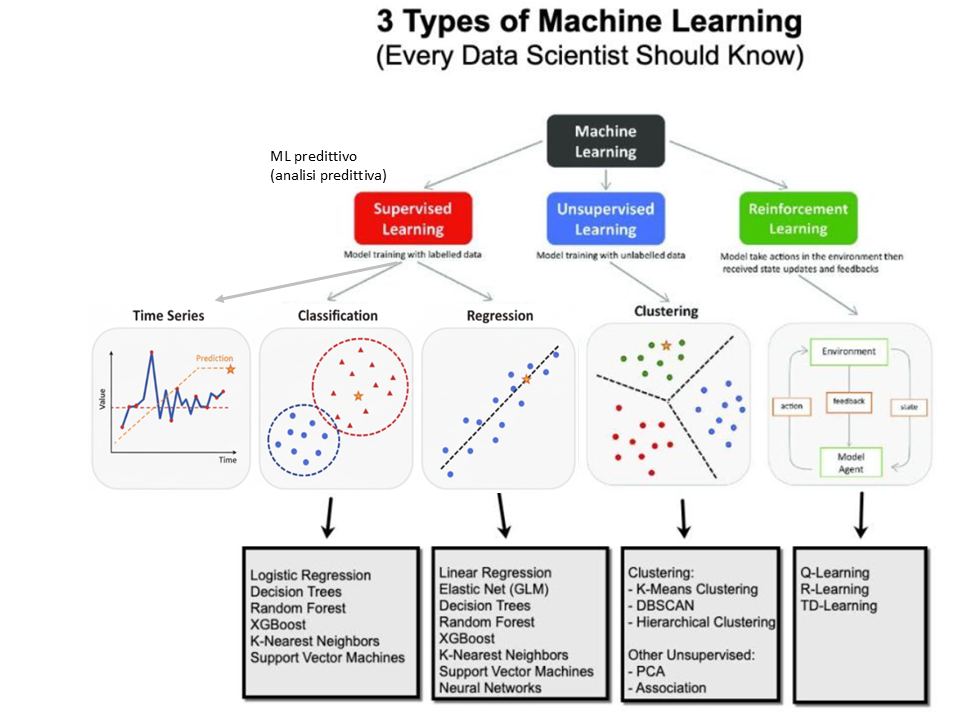

In [ ]:
Image('Tipi_apprendimento.png') if IN_COLAB else display(Image(filename='CNN.png'))

Un'altra **tassonomia** degli algoritmi per <u>dati strutturati</u>, cioè tabellari (sempre suddivisi per tipo di apprendimento):

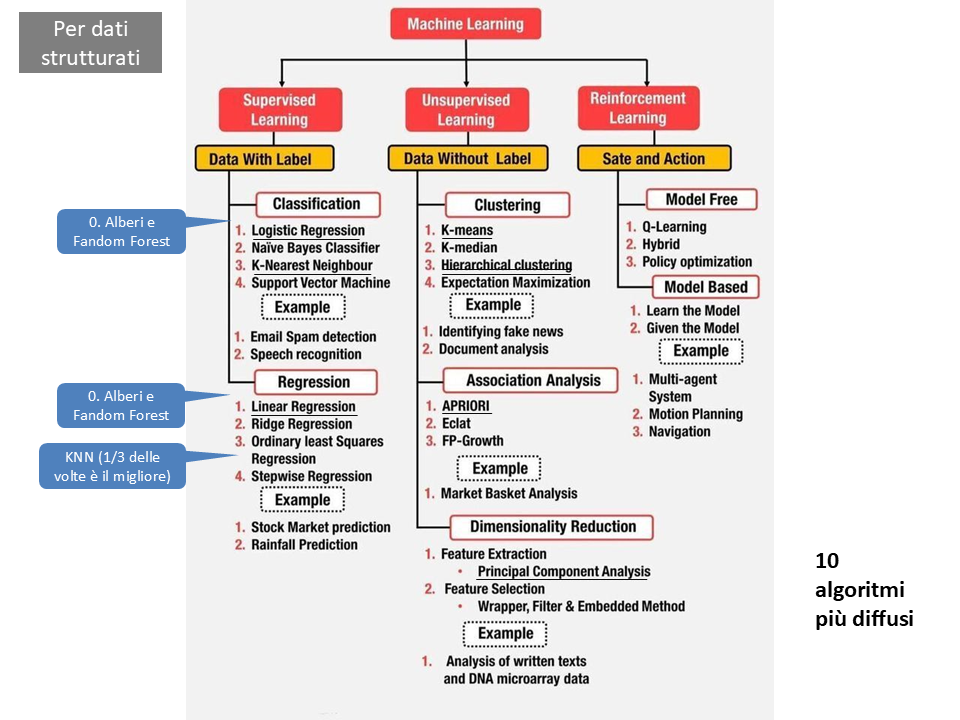

In [ ]:
Image('tassonomia_algoritmi_2.png') if IN_COLAB else display(Image(filename='tassonomia_algoritmi_2.png'))

Vediamone qualcuno (i principali) più in dettaglio:

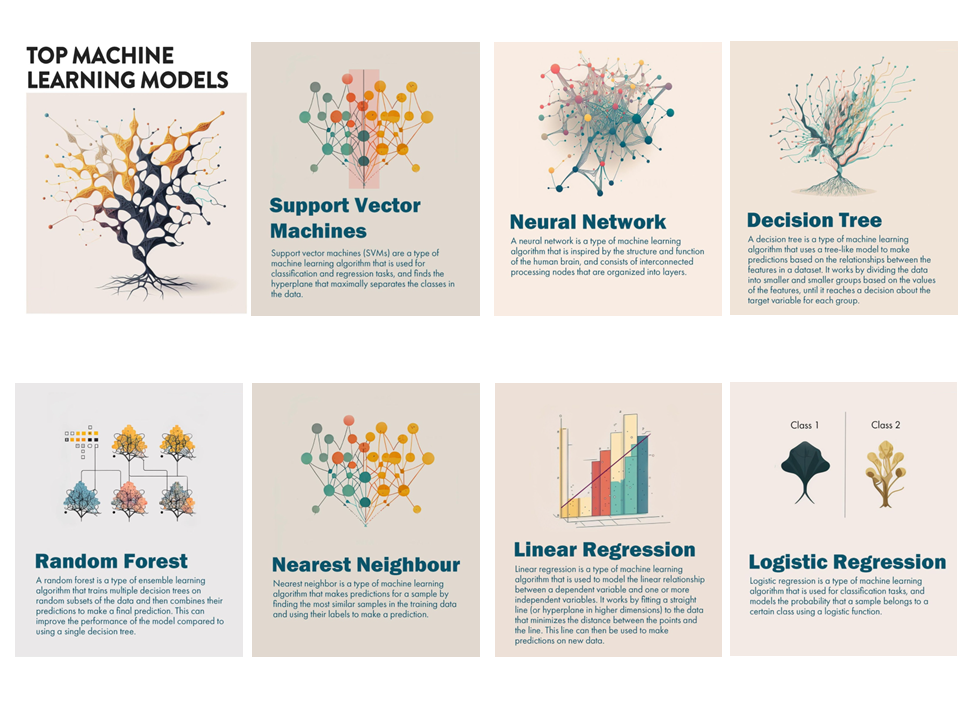

In [ ]:
Image('tassonomia_algoritmi_3.png') if IN_COLAB else display(Image(filename='tassonomia_algoritmi_3.png'))

Alcuni distinguono gli algoritmi di ML in **2 famiglie**:

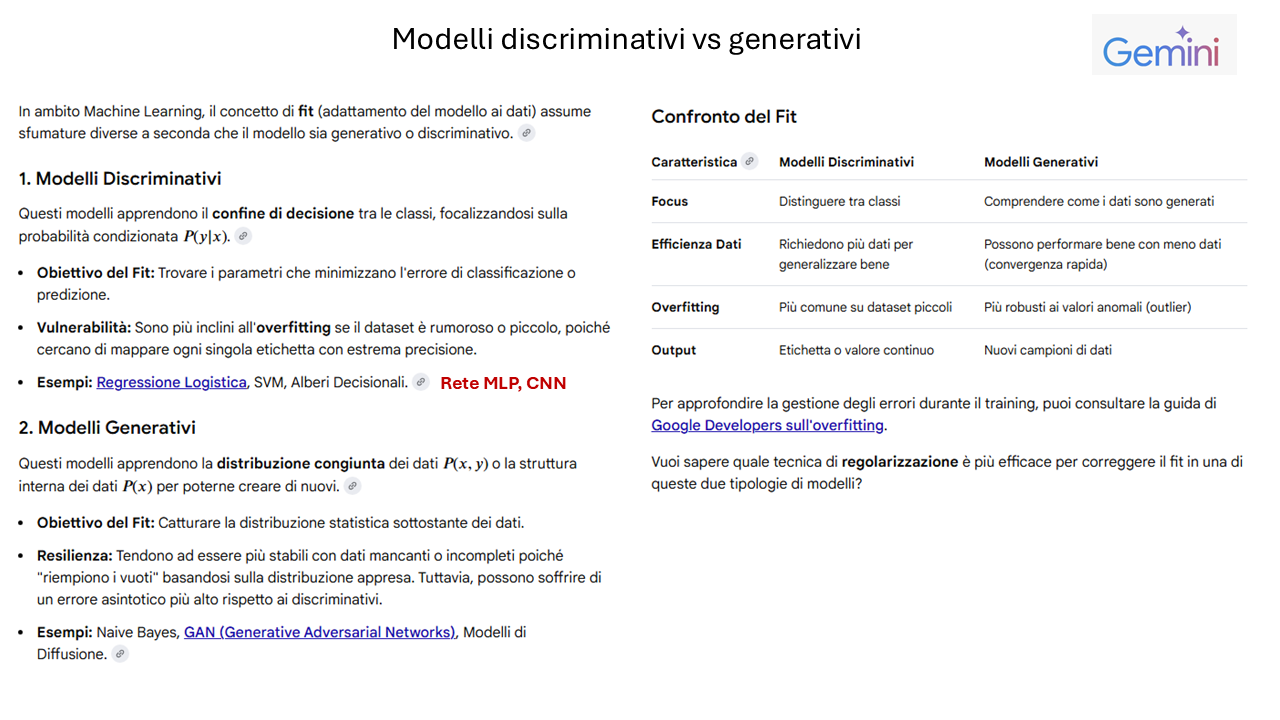

In [ ]:
Image('tassonomia_algoritmi.png') if IN_COLAB else display(Image(filename='tassonomia_algoritmi.png'))

Più importante è capire bene **i termini**, <u>in quest'ordine/u>: dataset, algoritmi, fit, modelli

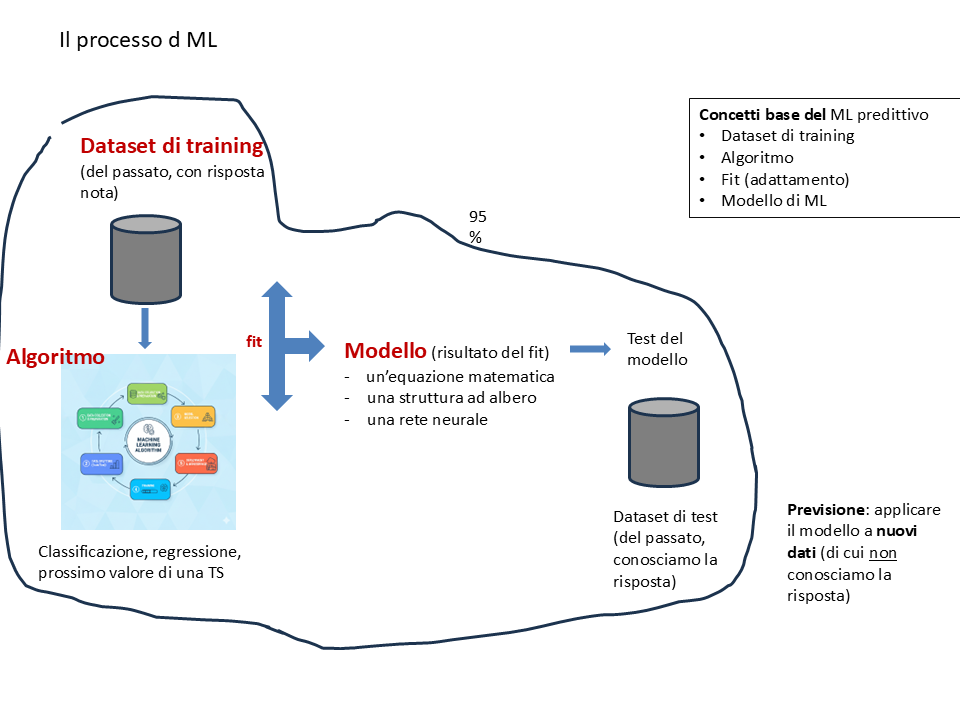

In [ ]:
Image('processo_ML.png') if IN_COLAB else display(Image(filename='processo_ML.png'))

Ci sono quindi **due modalità di utilizzo del ML**, da non confondere (qui applicate al dataset *german credit data*, che vedremo tra poco):

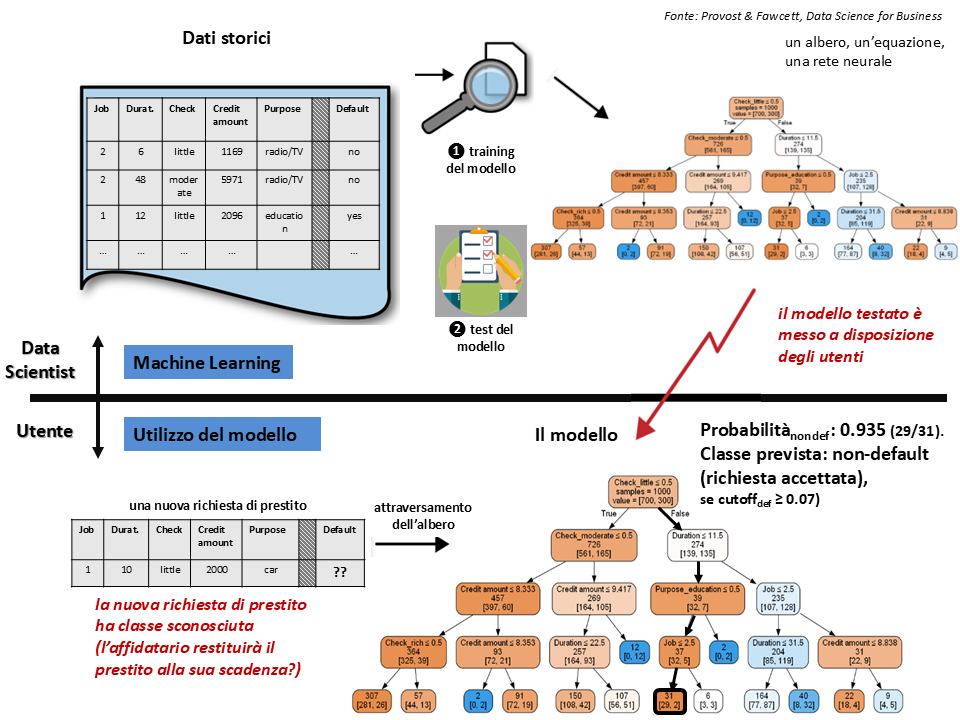

In [ ]:
Image('due_utilizzi_ML.png') if IN_COLAB else display(Image(filename='due_utilizzi_ML.png'))

# Caricamento dei dati
Usiamo il famoso dataset *german_credit_data*, creato ad hoc negli anni '90 da un professore universitario tedesco.

Spesso nel ML si usano dataset **simulati** (creati ad hoc) anzichè dataset **reali**. I dataset simulati:
- hanno il limite che spesso NON sono "sporchi" come i dataset reali, cioè spesso <u>non</u> hanno outlier e valori mancanti (MV)
- tuttavia, essendo costruiti ad hoc, possono **esibire delle proprietà** che magari un dataset reale non esibisce; ad esempio: pattern, trend, correlazioni, distribuzioni di probabilità (di colonna) particolari, ecc. E risultare quindi *più interessanti* per il ricercatore.

I dataset reali, inoltre, spesso **non sono semplicemente disponibili** perchè contengono <u>informazioni super-sensibili</u>, non facili da anomizzare.

---
👉 Attenzione: prima di eseguire la cella seguente assicurarsi di avere caricato nella *session storage* di Google Colab (la cartella *File* nel menù verticale a sx) il file csv *german_credit_data*!

---

In [7]:
# Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)
df_credit.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

I **valori mancanti** (*MV=Missing Values*, anche detti *Na/NaN=Not Available*), se molti, possono creare dei **problemi** ad alcuni algoritmi predittivi, e duqnue devono essere **gestiti** in uno di questi 3 modi:
* **eliminando** tutte le righe del dataset che contengono almeno un MV (troppe righe eliminate?)
* **inserendo** per ogni cella MV la mediana di colonna (non la media, non robusta con gli outlier)
* **prevedendo**  ogni cella MV con un modello predittivo (la soluzione migliore ma più complessa)


En passant, vediamo i due principali tipi di dati STRUTTURATI di pandas: **serie** e **dataframe**:

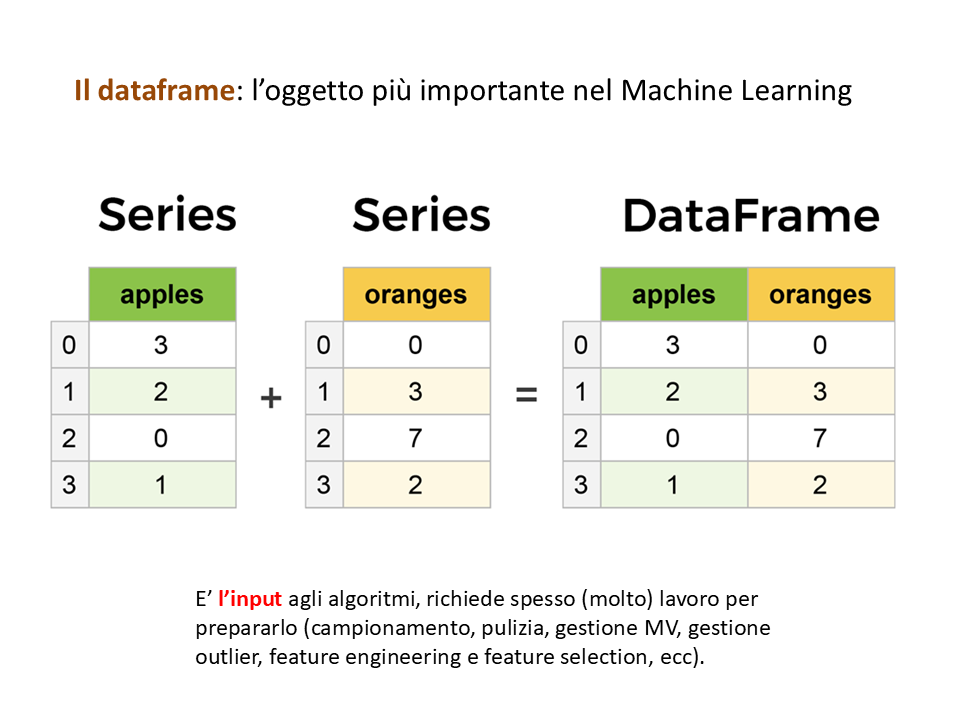

In [ ]:
Image('Series_vs_Dataframe.png') if IN_COLAB else display(Image(filename='Series_vs_Dataframe.png'))

🔍 Significato del dataset

Il file *german_credit_data.csv* è un dataset classico di machine learning e data analysis che rappresenta **informazioni su clienti a cui è stato concesso un credito (prestito)**.

L’obiettivo tipico è prevedere se un cliente è un “buon” o “cattivo” pagatore — cioè se restituirà o meno il prestito.

Questo dataset viene spesso utilizzato per:
- esercizi di classificazione binaria (“Good” vs “Bad” credit);
- analisi di **rischio creditizio**;
- studi di fairness e bias (età, sesso, ecc.);
- modellazione con logistic regression, alberi decisionali, o **reti neurali**.

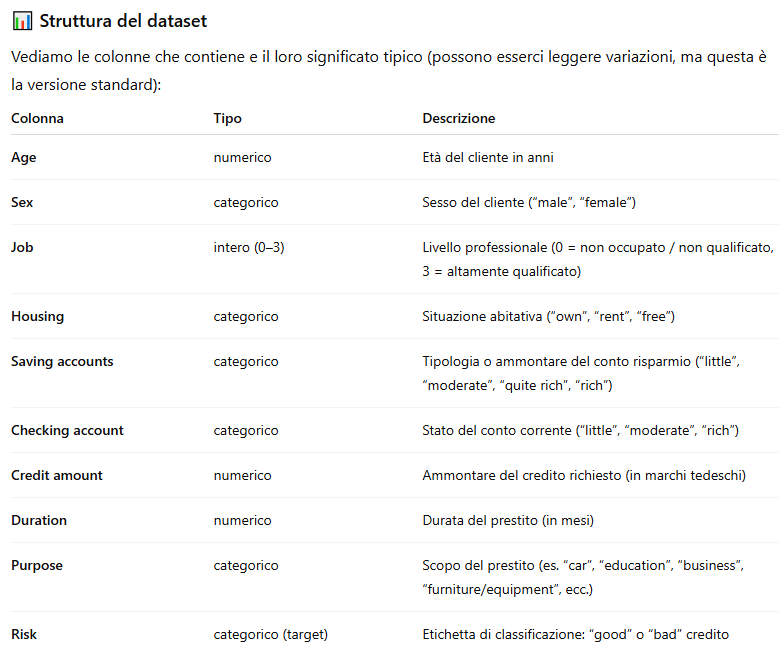

In [ ]:
Image('struttura_german_credit.png') if IN_COLAB else display(Image(filename='struttura_german_credit.png'))

Le prime 9 colonne sono i **predittori**, l'ultima colonna è la **risposta**. La determinazione della colonna risposta NON è data dalla posizione della colonna nel dataframe (la prima o l'ultima), ma è una nostra **scelta** applicativa. La scelta della colonna *Risk* è indubbiatamente molto sensata ma non obbligatoria.

*Good* e *bad* sono dati storici, verificati dalla banca **a posteriori**. E' l'**etichettatura** (il *labelling*), spesso il costo principale del modello predittivo.

Dei 9 predittori:
- i primi 7 sono dati socio-demografici del cliente
- gli ultimi 2 (*Duration* e *Purpose*) sono dati del prestito.

Per esattezza, la singola riga rappresenta un prestito, richiesto da un determinato cliente. In teoria, potremmo avere due differenti prestiti (come importo e durata) richiesti dallo STESSO cliente.

Su questo dataset, come detto prima, possiamo fare molte cose:
- **EDA**: analisi esplorativa dei dati (vogliamo **capire** i dati), <u>senza costruzione di modelli predittivi</u>; ad esempio: qualche plot (scatterplot, boxplot, istogrammi, ecc), ricerca outlier, ricerca MV, analisi delle correlazioni, ricerca di trend e pattern nei dati, ecc
- costruire (fittare) un modello di previsione (su una certa colonna risposta) - --> **ML predittivo**
- segmentare il dataset --> **clustering** (ML non supervisionato)

EDA è spesso uno **step preliminare** ai modelli predittivi.

---
Se vogliamo costruire un modello predittivo per una delle sue colonne una scelta naturale, ma come detto non obbligata, è la colonna *Risk*.

> La colonna *Risk* è riferita al futuro (le previsioni future), ma probabilmente sarebbe meglio denominata in questo dataset come **Default** (cioè riferita al passato, che è noto) con 2 possibili valori: 0 (False) e 1 (True). I 2 valori della colonna sono invece *good* e *bad* (riferiti appunto al futuro) da intendersi rispettivamente, in modo secondo me più chiaro, come 0 (no default) e 1 (default).

**Poichè la colonna *Risk* è categorica (in sè, al di là del suo formato, alfanumerico in questo caso), è un problema (predittivo) di classificazione e dunque dobbiamo usare un algoritmo di ML per la classificazione**, in questo notebook gli alberi di decisione (che comunque sono utilizzabili anche per problemi di regressione con risposta numerica).

---

L'immagine qui sotto illustra la **fondamentale differenza tra variabili qualitative e quantitative**:

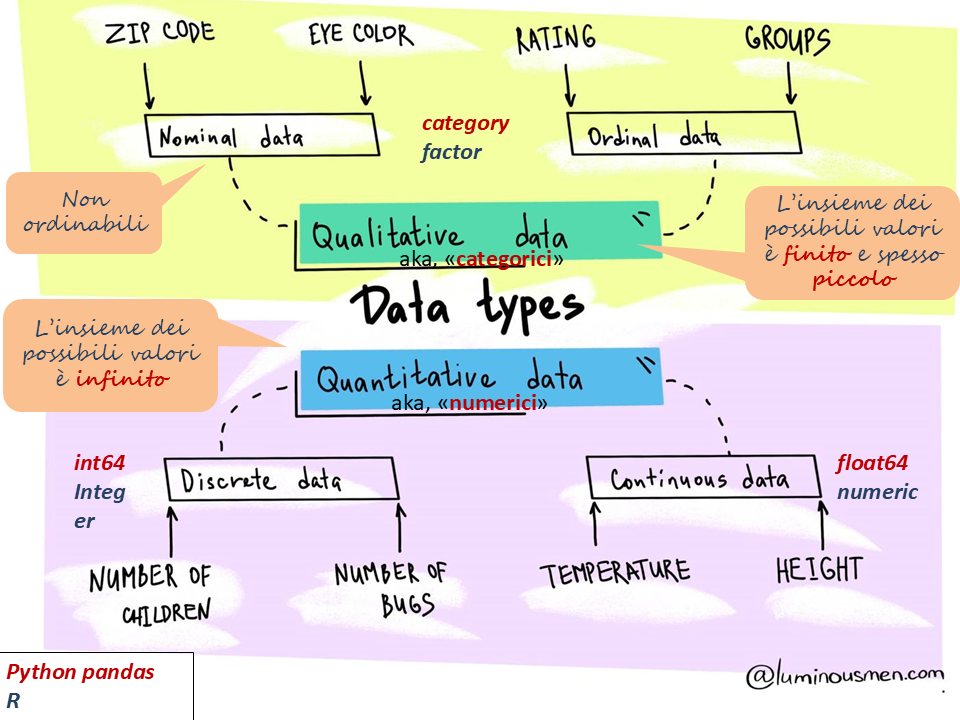

In [ ]:
Image('tipi_variabili.png') if IN_COLAB else display(Image(filename='tipi_variabili.png'))

Una buona abitudine è quella di **rimescolare** il dataset, che potrebbe infatti contenere degli ordinamenti per colonne che non ci sono noti e non rileviamo e che potrebbero influenzare i risultati dall'algoritmo. Si fa in questo modo:

In [8]:
n = df_credit.shape[0]            # il numero di righe del dataset

df_credit = df_credit.sample(n, random_state=1000)
                                  # l'estrazione campionaria di tutte le righe (una volta sola per riga perchè
                                  # l'argomento 'replace' = False - il default) con sovrascrittura del dataset originario
                                  # con il suo campione --> l'effetto è il rimescolamento casuale di tutto il dataset.

                                  # random_state è il seme, che garantisce la RIPRODUCIBILITA' dell'operazione

In [11]:
df_credit.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
967   54  female    3    rent          little              NaN           3568   
713   25    male    1     own          little           little           1138   
222   30    male    2     own          little              NaN            707   
321   32    male    2     own          little           little           1938   
898   33  female    1    rent             NaN              NaN           2186   

     Duration              Purpose  Risk  
967        15             radio/TV  good  
713         9             radio/TV  good  
222        12             radio/TV  good  
321        24             radio/TV   bad  
898        15  furniture/equipment  good

In [12]:
df_credit.shape   # le dimensioni NON sono cambiate!

(1000, 10)

> Il campionamento di default del metodo *sample* è infatti **senza reimmissione** della riga nel dataset (*replace = False*), cioè, una volta che una riga viene selezionata, non può essere selezionata di nuovo nello stesso campionamento.

# EDA
Per iniziare, facciamo un pò di **analisi dati esplorativa (EDA)**.

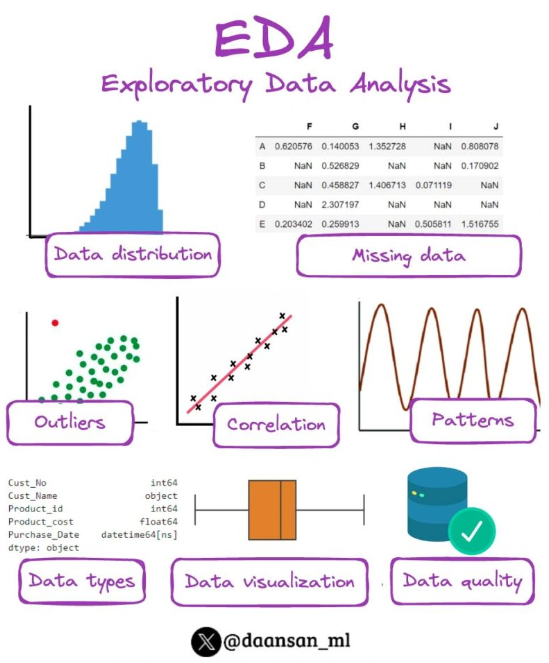

In [ ]:
Image('EDA.png') if IN_COLAB else display(Image(filename='EDA.png'))

Cominciamo con la verifica del **numero delle dimensioni del dataframe e del loro *size*** (la cardinalità della dimensione):

In [13]:
df_credit.shape

(1000, 10)

Vediamo ora i data type **elementari** (aka, atomici):

In [14]:
df_credit.dtypes  # i data type elementari

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

Il formato CSV - quello più utilizzato nel ML, per molte motivi - NON include la definizione del datatype, come invece in una tabella SQL o in un file excel. La funzione pandas *read_csv*, che ha prima caricato i dati nel dataframe *df_credit*, deve pertanto **DEDURRE** il datatype di ogni colonna tramite l'esame di tutti i valori della colonna. Quindi spesso, per mancanza di metadati, deduce il formato scorretto. In questo caso, infatti, le colonne *Sex*, *Housing*, *Saving Account*, *Checking Account*, *Purpose* sono chiaramente categoriche (perchè possono assumere un numero finito e predefinito di valori), il formato *object* (stringa in pandas) non è appropriato per esse e dovrà essere convertito nel più appropriato datatype pandas *Category*.

Un passo fondamentale della EDA è l'individazione di eventuali MV o outlier (valori molto fuori range). Tra l'altro, sia gli MV che gli outlier **impattano molto** sulle previsioni di alcuni algoritmi di ML.<br>
Un modo semplice e veloce per esaminare se nel dataset ci sono MV (e in parte anche outlier) è usare il metodo *sample* con **n=k, con k piccolo, ad esempio 10**, e eseguire il campionamento un buon numero di volte verificando ogni volta, al volo, la presenza di MV (facili da cogliere) e degli outlier (meno facili da cogliere al volo rispetto ai MV):

In [20]:
n = 10                 # un buon compromesso tra numero di campionamenti e leggibilità veloce dei risultati
df_credit.sample(n)    # ovviamente NON definiamo il seme

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
45    35  female    3     own          little              NaN           1393   
419   33  female    2     own             NaN         moderate           1042   
77    51    male    2     own          little         moderate           4771   
363   21    male    2    rent          little              NaN           1766   
678   64    male    1    rent          little           little           2384   
702   47  female    2    free        moderate             rich           1377   
879   36    male    2     own             NaN              NaN           6742   
994   50    male    2     own             NaN              NaN           2390   
831   23  female    2    rent          little           little           1216   
361   37    male    3     own             NaN             rich           3399   

     Duration              Purpose  Risk  
45         11                  car  good  
419        18                  car   bad  
77         11             radio/TV  good  
363         6  furniture/equipment  good  
678        24             radio/TV  good  
702        24             radio/TV  good  
879        30             radio/TV  good  
994        12                  car  good  
831        18                  car   bad  
361        12             radio/TV  good

Vediamo i data type **aggregati**:

In [21]:
type(df_credit)

pandas.core.frame.DataFrame

In [22]:
type(df_credit['Age'])

pandas.core.series.Series

Un passo fondamentale della EDA è il calcolo delle **statistiche** delle varie colonne (numeriche):

In [23]:
round(df_credit.describe(),2)   # per i soli dati numerici

Age      Job  Credit amount  Duration
count  1000.00  1000.00        1000.00   1000.00
mean     35.55     1.90        3271.26     20.90
std      11.38     0.65        2822.74     12.06
min      19.00     0.00         250.00      4.00
25%      27.00     2.00        1365.50     12.00
50%      33.00     2.00        2319.50     18.00
75%      42.00     2.00        3972.25     24.00
max      75.00     3.00       18424.00     72.00

**Quanti sono i livelli** di una variabile categorica? E **quante righe** ci sono per ogni livello? C'è la funzione numpy `np.unique` e soprattutto il metodo pandas `value_counts`:

In [25]:
# elenco valori unici con funzione numpy (senza conteggi)
np.unique(df_credit['Housing'])        # 3 livelli

array(['free', 'own', 'rent'], dtype=object)

In [26]:
# calcolo valori unici (sempre di 'housing' con metodo pandas
df_credit['Housing'].value_counts()    # le righe per livello

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [27]:
df_credit['Purpose'].value_counts()    # le righe per livello

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [28]:
df_credit['Checking account'].value_counts()    # le righe per livello

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

Occorre infine considerare i livelli (e la loro numerosità) anche della colonna risposta.

In [29]:
df_credit['Risk'].value_counts()       # le righe per livello

Risk
good    700
bad     300
Name: count, dtype: int64

Nei problemi di classificazione, un aspetto importante è il **bilanciamento** della colonna <u>risposta</u> (rispetto ai suoi possibili valori).<br>
Questo dataset è abbastanza bilanciato (perchè lo è stato a monte da parte del prof. tedesco, non perchè lo fosse nella realtà).<br>
Se esso fosse molto sbilanciato, ad esempio 1% bad e 99% good (come può essere nella realtà), l'algoritmo non "imparerebbe" bene a riconoscere i *bad*.<br>
In questi casi, nei quali cioè l'**evento di interesse** è raro, occore <u>ribilanciare il dataset</u>, in vari modi. Uno dei più diffusi ed efficaci è lo [SMOTE](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis), [qui](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) e [qui](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/) in python.

Terminata la EDA (qui molto sintetica), costruiamo il **modello** predittivo del *Risk* in funzione delle altre colonne.<br>
La seguente è una **cella fondamentale**, dove si valorizzano i due oggetti `predictors` e `outcome`, e dunque li potrere **PERSONALIZZARE** in base al VOSTRO dataset!<br>
E' l'approccio standard con *pandas* e *scikit-learn*.

In [30]:
# dividiamo le variabili in due gruppi  (mere liste di colonne):
predictors = ['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']
outcome = 'Risk'  # a volte chiamato 'risposta' oppure 'target'

# La dummizzazione
Vediamo ora il fondamentale aspetto della **dummizzazione**, rilevante a prescindere dall'algoritmo di ML utilizzato.

(*) Nell'informatica una variabile *dummy* è una variabile binaria numerica.

**Nota generale**<br>
Gli algoritmi di ML lavorano con i numeri (cioè in spazi lineari $\mathbb{R}^{p}$, gli algoritmi di classificazione, oppure $\mathbb{R}^{p+1}$, gli algoritmi di regressione, dove $p$ è il numero dei predittori), quindi le variabili **predittore** di tipo categorico - formattate sia in modo numerico che alfanumerico (*object*) - devono essere <u>preventivamente</u> tradotte in variabili booleane (per poter applicare l'algoritmo predittivo). Il booleano è infatti un datatype numerico. Ci sono vari modi per farlo, il più diffuso dei quali in *pandas* è la funzione pandas `get_dummies`. Le *dummies* sono variabili binarie, che - al di là della loro rappresentazione (*True*/*False*) - sono intrinsecamente booleane. Tutti i software infatti trattano internamente *True*/*False* come 1/0.

Dunque *dummizziamo* il nostro dataset:

In [31]:
X = pd.get_dummies(df_credit[predictors],drop_first=False)   #  X: tante righe e tante colonne --> è una MATRICE (dataframe)
y = df_credit[outcome]                                       #  y: tanti elementi--> è un vettore (series)

**CINQUE NOTE** sulla cella precedente:

---
Si dummizzano i predittori, NON la risposta!

---
Due **convenzioni** (in matematica ed anche nel Machine Learning)<br>
* usare le maiuscole per indicare MATRICI e le minuscole per indicare VETTORI
* indicare la matrice dei predittori come $\mathbf{X}$ e il vettore delle riposte come $\mathbf{y}$ perchè l'algoritmo di ML implementa un modello del tipo $\mathbf{y}=f(\mathbf{X})$<br>


---

Come fa la funzione `get_dummies` a **riconoscere le variabili categoriche** da esplodere in una serie di variabili dummy?

Ecco la risposta di Gemini:<br>
*La funzione *pd.get_dummies* riconosce le variabili categoriche **basandosi sul loro datatype**. Per default, *get_dummies* converte in variabili dummy le colonne che hanno un datatype **object** (che in pandas rappresenta tipicamente le stringhe) o **category**.*

*Nelle celle precedenti, abbiamo visto che colonne come 'Sex', 'Housing', 'Saving accounts', 'Checking account' e 'Purpose' erano state caricate con datatype **object**. È per questo che *get_dummies* le ha automaticamente identificate come categoriche e le ha "esplose" in variabili dummy. Le colonne con datatype numerico (int64, float64, ecc.) non vengono modificate di default da *get_dummies*.*


---
L'argomento *drop_first=False* della funzione *pd.get_dummies* **forza la [codifica one-hot](https://it.wikipedia.org/wiki/One-hot)**.<br>

---
Come si decide il livello *baseline*, cioè quello eliminato (perchè più importante o più frequente)? Di default, la funzione `get_dummies` ordina le variabili di livello in modo alfabetico ed elimina la prima. E' ovviamente definire un ordine diverso tramite la funzione pandas `Categorical`, vedi [questa chat](https://chatgpt.com/share/698b1e3e-8198-8012-95f8-f15ec616b674).

Vediamo i risultati della dummizzzione:

In [32]:
display(X.head())
X.shape

Age  Job  Credit amount  Duration  Sex_female  Sex_male  Housing_free  \
967   54    3           3568        15        True     False         False   
713   25    1           1138         9       False      True         False   
222   30    2            707        12       False      True         False   
321   32    2           1938        24       False      True         False   
898   33    1           2186        15        True     False         False   

     Housing_own  Housing_rent  Saving accounts_little  ...  \
967        False          True                    True  ...   
713         True         False                    True  ...   
222         True         False                    True  ...   
321         True         False                    True  ...   
898        False          True                   False  ...   

     Checking account_moderate  Checking account_rich  Purpose_business  \
967                      False                  False             False   
713                      False                  False             False   
222                      False                  False             False   
321                      False                  False             False   
898                      False                  False             False   

     Purpose_car  Purpose_domestic appliances  Purpose_education  \
967        False                        False              False   
713        False                        False              False   
222        False                        False              False   
321        False                        False              False   
898        False                        False              False   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
967                        False              True            False   
713                        False              True            False   
222                        False              True            False   
321                        False              True            False   
898                         True             False            False   

     Purpose_vacation/others  
967                    False  
713                    False  
222                    False  
321                    False  
898                    False  

[5 rows x 24 columns]

(1000, 24)

Come si vede, la dummizzazione ha portato all'aumento delle colonne predittore, da 9 a 24, ora tutte numeriche (True = 1, False = 0).

Tutto bene, ma c'è un problema. La codifica *one-hot* può **introdurre [**multi-collinearità**](https://en.wikipedia.org/wiki/Multicollinearity) perfetta nei modelli <u>lineari con intercetta**</u>, a causa della **ridondanza** della informazione (vedi la *Dummy Variable Trap* più avanti); per evitarla, in questi casi, si deve **eliminare** una delle variabili dummy, ovvero, se i livelli di una generica variabile categorica sono $k$, occorre creare **solo ($k-1$) dummy variable**. Lo si fa impostando l'argomento *drop_first* a *True* della funzione *pd.get_dummies*, che imposta TUTTE le variabili categoriche a (k-1) livelli.

Questo è il classico approccio per la Regressione, Regressione Logistica, ecc.

In altri modelli di ML, - come alberi (CART), random forest, reti neurali - ciò non è necessariamente un problema. Ad esempio:<br>
*In contrast to the situation with statistical models such as regression, **all k binaries** should be created and used with CART. While mathematically this is redundant, since k − 1 dummies contain the same information as k dummies, this redundant information does not create the multicollinearity problems that it does for linear models. Moreover, in CART the use of k − 1 dummies can yield different classifications than the use of k dummies, and lead to an imbalance in the contribution of the different categories to the model.*<br>
Shmueli, Galit; Bruce, Peter C.; Gedeck, Peter; Patel, Nitin R.. Data Mining for Business Analytics (p.193 and 223). Wiley.

Dunque ridefiniamo `X`, con sovrascrittura, con `drop_first=True` (`y` va bene):

In [33]:
X = pd.get_dummies(df_credit[predictors],drop_first=True)

In [ ]:
display(X.head())
print(X.shape)
y.shape

Age  Job  Credit amount  Duration  Sex_male  Housing_own  Housing_rent  \
848   59    2           1364         9      True         True         False   
346   23    2            882        13      True         True         False   
602   34    1           1837        24     False        False         False   
747   37    1           1274        12     False         True         False   
13    60    1           1199        24      True         True         False   

     Saving accounts_moderate  Saving accounts_quite rich  \
848                     False                       False   
346                     False                       False   
602                     False                       False   
747                     False                       False   
13                      False                       False   

     Saving accounts_rich  Checking account_moderate  Checking account_rich  \
848                 False                      False                  False   
346                 False                       True                  False   
602                 False                       True                  False   
747                 False                      False                  False   
13                  False                      False                  False   

     Purpose_car  Purpose_domestic appliances  Purpose_education  \
848        False                        False              False   
346        False                        False              False   
602        False                        False               True   
747         True                        False              False   
13          True                        False              False   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
848                        False              True            False   
346                        False              True            False   
602                        False             False            False   
747                        False             False            False   
13                         False             False            False   

     Purpose_vacation/others  
848                    False  
346                    False  
602                    False  
747                    False  
13                     False

(1000, 19)


(1000,)

---
## Note sulla codifica delle variabili categoriche (saltabile)

If you use **one-hot encoding**, read this:

(It might introduce a problem in the dataset)

When we one-hot encode categorical data, we unknowingly introduce **perfect multicollinearity**.

Multicollinearity arises when two or more features can predict another feature.

As the sum of one-hot encoded features is **always 1**, it leads to perfect multicollinearity and it can be problematic for models that don't perform well under such conditions.

This is often called the **Dummy Variable Trap**.

Talking specifically about linear regression, for instance, it is bad because:
- In some way, your data has a redundant feature
- Regression coefficients aren't reliable in the presence of multicollinearity, etc.

So how to resolve this?

The **solution is simple**.

**Drop any arbitrary feature** from the one-hot encoded features.

This instantly mitigates multicollinearity and breaks the linear relationship that existed before.


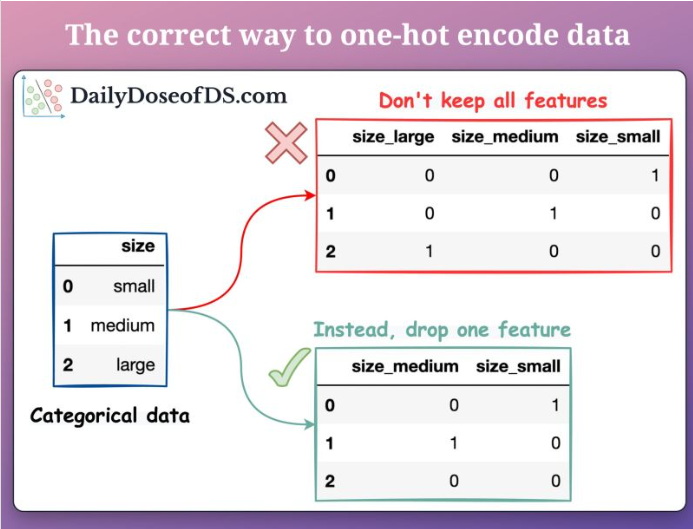

In [ ]:
Image('encoding_right.png') if IN_COLAB else display(Image(filename='encoding_right.png'))

---

Vediamo ora i data-type di `X` e `y`:

In [34]:
display(type(X))
display(type(y))

pandas.core.frame.DataFrame

pandas.core.series.Series

In [ ]:
# Attenzione!
y_bis = df_credit[[outcome]]     # doppie quadre
print(type(y_bis))               # --> un dataframe
y_bis.shape

<class 'pandas.core.frame.DataFrame'>


(1000, 1)

> Come detto prima, la dummizzazione delle variabili categoriche si applica **solo ai predittori**, non alla risposta (la cui unica possibile trasformazione è nel data type di pandas *category*). Idem per l'eventuale **standardizzazione** dei dati (vedi più avanti).

*Bottom-line*: per le analisi e la modellazione (successive) è bene usare **il dataframe dummizzato nella versione con (k-1) livelli**, l'ultimo peraltro a essere stato definito (con sovrascrittura del precedente).

# Spazi vettoriali, spazi multi-dimensionali, varietà manifold

Un informatico ed un matematico sono davanti ad una **tabella dati** visualizzata a video, composta da *n* righe e *p* colonne (predittori). Per l'informatico essa è una tabella (RDB, excel, google sheet) con indici, formati e chiavi. Per il matematico essa è un vettore $\mathbf{x} = (x_1, x_2, \dots, x_p) \in \mathbb{R}^p$.
C'è un **MISMATCH culturale**.




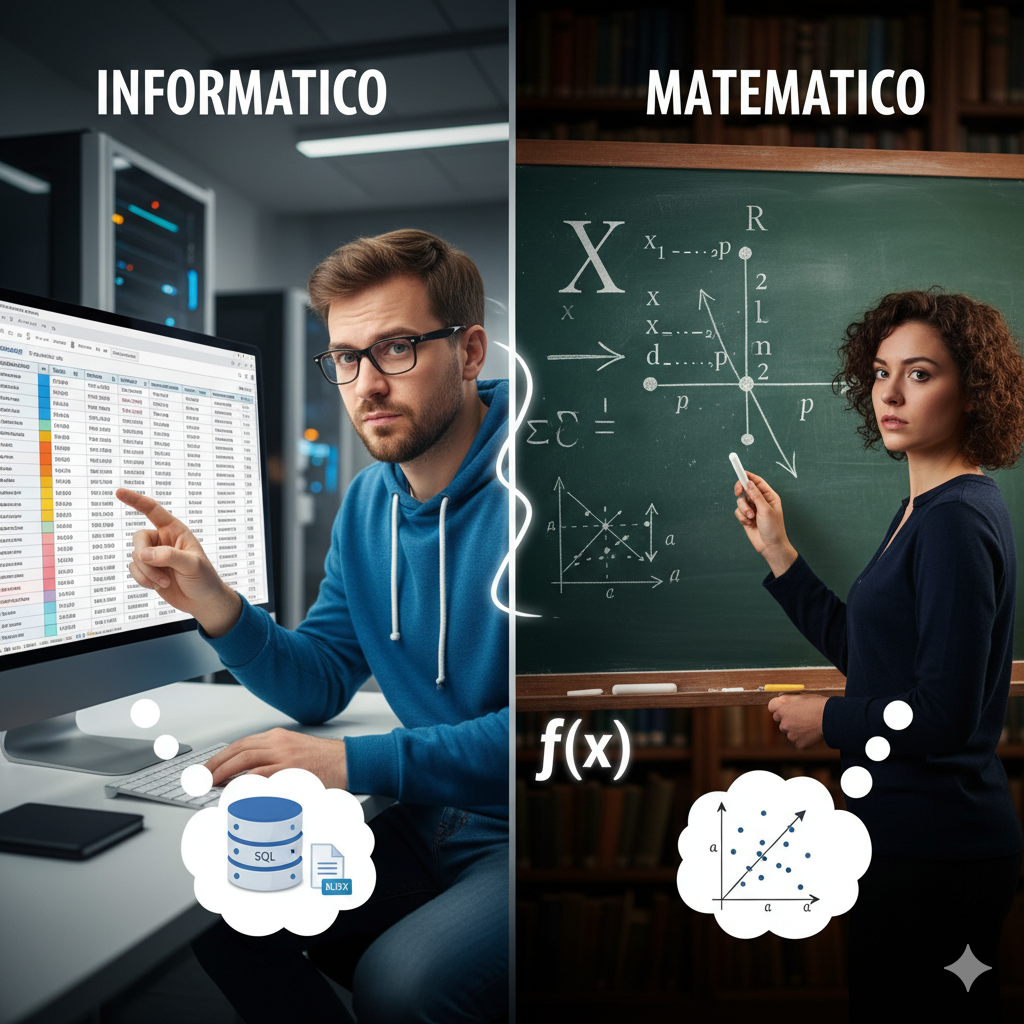

In [ ]:
Image('tabella_vs_vettore.png',width=800) if IN_COLAB else display(Image(filename='tabella_vs_vettore.png'))

👉 Dove giacciono i dati? (le righe della tabella) In che spazio?<br>
Ci sono **diversi scenari**.

---
Nei modelli **lineari** (regressione lineare, regressione logistica, PCA, SVM lineare) - e quindi anche nelle reti neurali a livello di singolo layer (Wx + b), cioè la parte lineare della rete, oppure nelle reti neurali basiche lineari come il percettrone a l'adaline - lo spazio dei predittori è **uno spazio vettoriale**, con tutte le operazioni tipiche (combinazione lineare, prodotto scalare, norme e distanze, proiezioni, ecc).

---
Se i predittori <u>NON sono numerici</u>, ad esempio se ci sono variabili categoriche NON dummizzate, oppure se i predittori sono <u>NON-strutturati</u> (immagini, testi, ecc) lo spazio dei predittori è un generico **spazio multi-dimensionale** (in gergo, *feature space*, non necessariamente vettoriale).

---

Se i dati NON numerici sono codificati [*one-hot*](https://en.wikipedia.org/wiki/One-hot) e se i dati NON-strutturati sono stati [*embedded*](https://en.wikipedia.org/wiki/Embedding_(machine_learning)), allora lo spazio multi-dimensionale diventa vettoriale, cioè:<br> oggetto reale --> rappresentazione numerica --> $\mathbb{R}^p$

---
Nel Deep Learning lo spazio dei predittori è spesso **uno spazio multi-dimensionale strutturato**, che diventa vettoriale solo dopo la rappresentazione numerica.

E' una distinzione importante: il matematico parla di "vettori in uno spazio vettoriale", il Data Scientist parla di "feature space".

---

Nel Deep Learning (cioè, reti neurali applicate a dati NON-strutturati), ad esempio immagini 224x224x3, i dati appartengono formalmente ad uno spazio vettoriale enorme, nell'esempio a $\mathbb{R}^{150528}$. Le immagini "realistiche", tuttavia, stanno solo in <u>una piccola regione strutturata</u>, approssimativamente una [**manifold a bassa dimensione**](https://en.wikipedia.org/wiki/Low-dimensional_topology). Cioè le immagini stanno su <u>una superficie curva dentro uno spazio enorme</u>.

---
Molti algoritmi moderni - ad esempio: auto-encoder, T-SNE, ecc - sfruttano questa struttura. L'obiettivo implicito è di **appiattire la varietà**, trovare coordinate latenti più semplici, rendere i dati quasi lineari.

---
👉  Quindi, **riassumendo**, nel Deep Learning formalmente si lavora su spazi vettoriali, ma la struttura reale dei dati è spesso una manifold non-lineare, cioè:
* **curva**
* **lineare solo localmente**
* geometria globale complessa


# Correlazione e collinearità?
4 check da fare tipicamente (nella <u>statistica standard</u>):
* **matrice di correlazione dei predittori NUMERICI**: ogni cella misura [l'indice di correlazione di Pearson](https://it.wikipedia.org/wiki/Indice_di_correlazione_di_Pearson) per quella coppia di predittori (relazioni bivariate). Per i predittori categorici si può eventualmente calcolare l'indice chisquare.
* **VIF** ([Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor)): misura quanto un predittore è spiegato come combinazione lineare degli altri predittori (si dice: collinearità locale, cioè non dell'intero sistema).
* il [**rango**](https://it.wikipedia.org/wiki/Rango_(algebra_lineare)) della matrice $\mathbf{X}$, per verificare se esistono dipendenze lineari esatte tra le colonne (collinearità perfetta, il modello non è identificabile e la matrice $(\mathbf{X}^\top \mathbf{X})$ non è invertibile - il problema della regressione lineare OLS)
* il [**condition number** della matrice $\mathbf{X}$](https://en.wikipedia.org/wiki/Condition_number), misura quanto il sistema è numericamente vicino alla collinearità (quasi-collinearità) e quindi la stabilità delle stime, anche quando il rango è pieno

> In **statistica ed econometria** è importante "validare" un modello predittivo esaminando le (eventuali) correlazioni tra coppie di predittori (**correlazioni**) e tra insiemi di predittori (**multi-collinerità)** della cosiddetta **matrice di disegno** $\mathbf{X}$. Ciò è tipico dei modelli statistici **lineari** classici, <u>mentre nel deep learning perde gran parte del suo significato operativo</u>. Infatti, nel deep learning:
>* il modello non è lineare
> * non si stimano coefficienti interpretabili
> * l’ottimizzazione non usa $(\mathbf{X}^\top \mathbf{X})^{-1}$
> * la ridondanza ≠ problema grave, la rete può imparare a ignorare feature ridondanti.
>
> Spesso la ridondanza è persino tollerabile se aumenta l’informazione potenziale.
>
> Vedi [questa utile ed esauriente risposta di chatGPT 5.2](https://chatgpt.com/share/698736d2-92fc-8012-b738-46d493b2b7b5).

Vediamo comunque rapidamente queste tecniche di verifica applicate al dataset *german credit data*.

## La matrice di correlazione dei predittori
Va calcolata sulla matrice che entrerà davvero nel modello.<br>
Quindi, nella maggior parte dei casi: **su X dummizzata**.

La [correlazione](https://it.wikipedia.org/wiki/Correlazione_(statistica)) esprime il grado col quale due variabili casuali (cioè nel Machine Learning due colonne PREDITTORE del dataframe) NUMERICHE (quantitative) **variano insieme**. La correlazione positiva può assumere valori tra 0 ad 1, la correlazione negativa tra 0 a -1.<br>
La [matrice di correlazione](https://en.wikipedia.org/wiki/Covariance_matrix), che è la matrice di varianza/covarianza standardizzata, riporta le correlazioni di tutte le coppie. E' una matrice quadrata (il numero delle righe è uguale a quello delle colonne) ed è simmetrica (la matrice triangolare superiore è uguale alla matrice triangolare inferiore).<br>
La diagonale principale è fatta solo da 1, perchè ogni variabile predittore correla perfettamente con se stessa.<br>
La correlazione è interessante da |0.6| o |0.7| in su (questo valore si spiega perchè, nella regressione lineare semplice: $R^2 = r_{XY}^2$). Sotto tale valore soglia la correlazione eventuale tra due predittori è mero caso ed in un nuovo differente dataset probabilmente non sarà più rilevata con tale magnitudo.

In [35]:
round(X.corr(method="pearson"),2)        # la matrice di correlazione di Pearson (il default)

Age   Job  Credit amount  Duration  Sex_male  \
Age                          1.00  0.02           0.03     -0.04      0.16   
Job                          0.02  1.00           0.29      0.21      0.07   
Credit amount                0.03  0.29           1.00      0.62      0.09   
Duration                    -0.04  0.21           0.62      1.00      0.08   
Sex_male                     0.16  0.07           0.09      0.08      1.00   
Housing_own                  0.01 -0.06          -0.12     -0.08      0.12   
Housing_rent                -0.21 -0.04          -0.02     -0.06     -0.22   
Saving accounts_moderate    -0.08  0.00           0.01      0.05     -0.00   
Saving accounts_quite rich   0.03 -0.04          -0.06     -0.04      0.03   
Saving accounts_rich         0.03 -0.02          -0.06     -0.05     -0.04   
Checking account_moderate   -0.08 -0.00           0.12      0.09     -0.01   
Checking account_rich        0.04 -0.05          -0.10     -0.08     -0.00   
Purpose_car                  0.10  0.04           0.13     -0.01      0.05   
Purpose_domestic appliances -0.01 -0.03          -0.07     -0.04     -0.05   
Purpose_education            0.06 -0.02          -0.03     -0.03     -0.05   
Purpose_furniture/equipment -0.13  0.01          -0.03     -0.06     -0.10   
Purpose_radio/TV            -0.05 -0.03          -0.17     -0.04      0.01   
Purpose_repairs              0.04 -0.09          -0.03     -0.02      0.03   
Purpose_vacation/others      0.04  0.10           0.19      0.10      0.01   

                             Housing_own  Housing_rent  \
Age                                 0.01         -0.21   
Job                                -0.06         -0.04   
Credit amount                      -0.12         -0.02   
Duration                           -0.08         -0.06   
Sex_male                            0.12         -0.22   
Housing_own                         1.00         -0.74   
Housing_rent                       -0.74          1.00   
Saving accounts_moderate           -0.02          0.03   
Saving accounts_quite rich          0.00          0.01   
Saving accounts_rich                0.03          0.00   
Checking account_moderate           0.00         -0.00   
Checking account_rich               0.02         -0.04   
Purpose_car                        -0.10          0.01   
Purpose_domestic appliances         0.03         -0.00   
Purpose_education                  -0.08         -0.01   
Purpose_furniture/equipment        -0.04          0.11   
Purpose_radio/TV                    0.13         -0.07   
Purpose_repairs                     0.02         -0.03   
Purpose_vacation/others            -0.01         -0.05   

                             Saving accounts_moderate  \
Age                                             -0.08   
Job                                              0.00   
Credit amount                                    0.01   
Duration                                         0.05   
Sex_male                                        -0.00   
Housing_own                                     -0.02   
Housing_rent                                     0.03   
Saving accounts_moderate                         1.00   
Saving accounts_quite rich                      -0.09   
Saving accounts_rich                            -0.08   
Checking account_moderate                        0.14   
Checking account_rich                           -0.02   
Purpose_car                                      0.03   
Purpose_domestic appliances                     -0.01   
Purpose_education                               -0.02   
Purpose_furniture/equipment                     -0.08   
Purpose_radio/TV                                -0.01   
Purpose_repairs                                  0.02   
Purpose_vacation/others                          0.02   

                             Saving accounts_quite rich  Saving accounts_rich  \
Age                                                0.03                  0.03   
Job  

Una matrice difficile da verificare. Esistono delle soluzioni:
* heatmap (serve il package `Jinja2`)
* matrici triangolari

In [36]:
if IN_COLAB:
  !pip install Jinja2
else:
  !conda install Jinja2 -y

In [37]:
# la heatmap:
X.corr(method='pearson', numeric_only=True).style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1) # 'RdBu_r', oppure 'BrBG_r', oppure ancora 'PuOr_r' sono altri buoni
                                                                                                      # schemi di colori divergenti.



# la matrice di correlazione (tra predittori) NON è ancora un modello (predittivo), anche se mettessimo dentro la variabile risposta


In [38]:
# la matrice triangolare (superiore)
corr = X.corr(method='pearson', numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

corr.where(mask).style.background_gradient(
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)


---
Una heatmap delle correlazioni può suggerire relazioni, ma non è uno strumento diagnostico affidabile per la multicollinearità, soprattutto quando ci sono dummy. Perché?

* la correlazione misura relazioni **bivariate**
* la multicollinearità è un fenomeno **multivariato**

Nel caso delle **dummy**:
* **correlazioni alte tra loro → attese**
* la presenza di multicollinearità rilevante va verificata con strumenti adeguati:
  - VIF elevati
  - rango($\mathbf{X}$) non pieno
  - condition number elevato

---

## (Multi)-collinearità tra predittori numerici
La verifica della multi-collinearità tra predittori numerici (*collinearity detection*).

> La correlazione, per definizione, è sempre una misura bivariata tra coppie di variabili numeriche. Tuttavia possono esistere dipendenze lineari che coinvolgono più variabili simultaneamente (**multicollinearità**).
Queste non sono necessariamente rilevabili esaminando la sola matrice di correlazione (Draper & Smith). La statistica classica suggerisce quindi, quando si sospetta multicollinearità, di calcolare i VIF.


**Il [VIF](https://en.wikipedia.org/wiki/Variance_inflation_factor) (Variance Inflation Factor)** misura la multicollinearità di un predittore rispetto agli altri.
* si calcola per ogni predittore;
* per ogni X_j si stima una regressione multipla di X_j sugli altri predittori;
* il VIF_j = $1 / (1 − R_j²)$, dove $R_j²$ è quello della regressione sopra.

Il VIF indica quanto la varianza dello stimatore del coefficiente associato a $X_j$ è aumentata a causa della presenza degli altri predittori.

Interpretazione:
* VIF ≈ 1 → nessuna multicollinearità
* VIF > 5 → possibile multicollinearità
* VIF > 10 → multicollinearità rilevante

Il VIF è calcolato sulla sola matrice dei predittori X: non è necessario utilizzare la variabile risposta y.

---
**Nota matematica**: i VIF forniscono indicazioni utili ma locali di possibili relazioni lineari tra predittori.<br>
Un’analisi più completa è quella proposta da [Belsley](http://fmwww.bc.edu/EC-P/wp190.pdf) (*condition indices* e *variance-decomposition proportions*).<br>
Il rango della matrice $(\mathbf{X}^\top \mathbf{X})$ non è sufficiente per rilevare la multicollinearità: esso non è pieno solo in presenza di combinazioni lineari esatte tra predittori.

Per individuare relazioni (anche approssimate) tra predittori occorre analizzare lo spettro degli autovalori della matrice $(\mathbf{X}^\top \mathbf{X})$, dove $\mathbf{Z}$ è la matrice dei predittori standardizzati.

Autovalori esattamente nulli indicano dipendenze lineari perfette; autovalori molto piccoli indicano direzioni di quasi-collinearità tra predittori (Draper & Smith).

Questa è esattamente l’impostazione classica di Draper & Smith, Belsley, Greene, Wooldridge.

---

[Come si rileva la multi-collinearità con il VIF in python](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/).

In *pandas* le colonne bool sono “numeriche” in senso lato, ma *statsmodels* spesso inciampa perché l’array che arriva a OLS può diventare *dtype=object* (specie se nel blocco ci sono tipi misti o booleani con missing). La **soluzione tradizionale e più solida è convertire i `bool` in 0/1 (anzichè `True/False`) e poi forzare tutto a `float` <u>prima</u> del calcolo del VIF**.

In [39]:
X19 = X.iloc[:, :19].copy()

# bool -> 0/1
bool_cols = X19.select_dtypes(include=["bool"]).columns
X19[bool_cols] = X19[bool_cols].astype(int)   # la forzatura da bool a int

# tutto numerico e float
X19 = X19.astype(float)                       # la forzatura di tutte le variabili a float

# NaN/inf (se presenti)
X19 = X19.replace([np.inf, -np.inf], np.nan).dropna()

# intercetta
X19c = sm.add_constant(X19)

# il calcolo del VIF dei 20 predittori
vif_data = pd.DataFrame({
    "predictor": X19c.columns,
    "VIF": [variance_inflation_factor(X19c.values, i) for i in range(X19c.shape[1])]
})

# print(vif_data)  # --> costante ha VIF molto alto; non è rilevante.
                 #     è normale. Il VIF della costante (intercetta) non va interpretato come quello degli altri predittori e può risultare molto alto
                 #     (anche decine o centinaia) senza che ci sia un problema reale di multicollinearità.

# per evitare confusione, NON calcoliamo il VIF della costante
vif_data_no_const = vif_data[vif_data["predictor"] != "const"]   # skip costante
print(vif_data_no_const.sort_values("VIF", ascending=False))     # ordinamento per VIF discendente



                      predictor       VIF
13                  Purpose_car  3.134030
17             Purpose_radio/TV  2.946657
7                  Housing_rent  2.649903
6                   Housing_own  2.534271
16  Purpose_furniture/equipment  2.512388
3                 Credit amount  1.878751
4                      Duration  1.739868
15            Purpose_education  1.594923
18              Purpose_repairs  1.223316
1                           Age  1.165216
19      Purpose_vacation/others  1.155531
14  Purpose_domestic appliances  1.135099
2                           Job  1.117420
5                      Sex_male  1.099450
11    Checking account_moderate  1.086895
8      Saving accounts_moderate  1.053962
12        Checking account_rich  1.041197
10         Saving accounts_rich  1.025680
9    Saving accounts_quite rich  1.024872


Soglie tradizionali:
* **VIF < 5** → nessun problema
* **VIF 5–10** → attenzione
* **VIF > 10** → multicollinearità seria

Nel nostro output:
* il massimo reale è ≈ 3.1 (Purpose_car)
* quindi **nessuna multicollinearità preoccupante** in questo dataset

---
**Nota teorica** (di algebra lineare)<br>
Il legame tra VIF dei predittori e condition number di $\mathbf{X}$ nasce dal fatto che:
* se $\mathbf{X}$ è standardizzata, i VIF sono proporzionali agli elementi diagonali di $(\mathbf{X}^\top \mathbf{X})^{-1}$
* il condition number di $\mathbf{X}$ dipende dal rapporto tra il massimo e il minimo valore singolare di X, oppure, equivalentemente, dal rapporto tra il massimo e il minimo autovalore di $(\mathbf{X}^\top \mathbf{X})^{-1}$

👉 Quindi: un VIF elevato per qualche predittore suggerisce che la matrice $\mathbf{X}$ possa essere mal condizionata, ma non lo garantisce né lo quantifica direttamente. Per una diagnosi completa della multicollinearità è corretto esaminare entrambi.


---

## Il *condition number* della matrice X


Il condition number (in norma 2) di una matrice $\mathbf{X}$ è:

$\kappa(X) = \frac{\sigma_{\max}(X)}{\sigma_{\min}(X)}$

dovedove $\sigma_{\max}$ e $\sigma_{\min}$ sono rispettivamente il massimo e il minimo **valore singolare** non nullo di $\mathbf{X}$.

Si può **dimostrare** che, in modo **equivalente**:
$\kappa(X)^2 = \frac{\lambda_{\max}(X^\top X)}{\lambda_{\min}(X^\top X)}$

dove:
$\lambda_{\max}(X^\top X)$ e $\lambda_{\min}(X^\top X)$ sono rispettivamente il massimo e il minimo **autovalore** di $X^\top X$.



In [40]:
kappa = np.linalg.cond(X19.to_numpy())
print(kappa)


45820.254809691636


Altissimo! Un condition number κ elevato indica che il problema è **mal condizionato**: piccole perturbazioni nei dati di input possono produrre grandi variazioni nelle stime.

Soglie indicative (empiriche):
* κ < 10 → nessun problema
* κ in [10,30] → collinearità debole
* κ in [30,100] → collinearità moderata
* κ > 100 → collinearità forte
* κ > 1000 → sistema quasi singolare, stime instabili

⚠️ Le soglie dipendono dalla scala delle variabili.

Per interpretare κ correttamente è utile **standardizzare $\mathbf{X}$**:
* se κ diminuisce molto → problema dovuto alla scala
* se resta elevato → multicollinearità strutturale (dummy, polinomi, interazioni, ecc.)

Vedi anche [questa chat](https://chatgpt.com/share/6987cb2c-9d18-8012-a680-aa18f25d0a96) in proposito.

In [41]:
# (A) condition number su X "così com'è" (quello che abbiamo già)
k_raw = np.linalg.cond(X19.to_numpy())

# (B) condition number su X standardizzata (diagnosi consigliata)
X_std = StandardScaler(with_mean=True, with_std=True).fit_transform(X)
k_std = np.linalg.cond(X_std)

print("kappa raw:", k_raw)
print("kappa std:", k_std)



kappa raw: 45820.254809691636
kappa std: 4.143227341793637


Tutto OK!

## Dipendenza lineare forzata

Come ultimo esempio, mostriamo l'effetto dell'aggiunta alla matrice $\mathbf{X}$ di una colonna fortemente correlata, ad esempio, il valore in euro del `Credit amount`. Il tasso ufficiale fisso dal 2002 è: **1 EUR=1,95583 DEM**.

In [43]:
# aggiunta della NUOVA colonna (al fondo):
# X_euro = X  # --> NO! (definisce un secondo puntatore, di nome X_euro, alla stessa area di memoria)
X_euro = X.copy()                                               # importante, altrimenti proliferazione di puntatori
X_euro['Credit amount - Euro'] = X['Credit amount']*1.95583     # l'aggiunta
display(X_euro)
X_euro.shape



Age  Job  Credit amount  Duration  Sex_male  Housing_own  Housing_rent  \
967   54    3           3568        15     False        False          True   
713   25    1           1138         9      True         True         False   
222   30    2            707        12      True         True         False   
321   32    2           1938        24      True         True         False   
898   33    1           2186        15     False        False          True   
..   ...  ...            ...       ...       ...          ...           ...   
251   46    1           2251        12     False         True         False   
704   32    2           2528        27     False         True         False   
71    46    1            730         7      True        False          True   
599   32    2           3863        24      True        False         False   
435   25    2           1484        12      True         True         False   

     Saving accounts_moderate  Saving accounts_quite rich  \
967                     False                       False   
713                     False                       False   
222                     False                       False   
321                     False                       False   
898                     False                       False   
..                        ...                         ...   
251                     False                       False   
704                     False                       False   
71                      False                       False   
599                     False                       False   
435                     False                       False   

     Saving accounts_rich  Checking account_moderate  Checking account_rich  \
967                 False                      False                  False   
713                 False                      False                  False   
222                 False                      False                  False   
321                 False                      False                  False   
898                 False                      False                  False   
..                    ...                        ...                    ...   
251                 False                      False                   True   
704                 False                       True                  False   
71                  False                      False                  False   
599                 False                      False                  False   
435                 False                       True                  False   

     Purpose_car  Purpose_domestic appliances  Purpose_education  \
967        False                        False              False   
713        False                        False              False   
222        False                        False              False   
321        False                        False              False   
898        False                        False              False   
..           ...                          ...                ...   
251        False                        False              False   
704        False                        False              False   
71         False                        False              False   
599        False                        False              False   
435        False                        False              False   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
967                        False              True            False   
713                        False              True            False   
222                        False              True            False   
321                        False              True            False   
898                         True             False            False   
..                           ...               ...              ...   
251                         True             False          

(1000, 20)

Ora ci sono **20** colonne!<br>
Facciamo la standardizzazione:

In [44]:
# la standardizzazione, come prima
X_euro_std = StandardScaler(with_mean=True, with_std=True).fit_transform(X_euro)
X_euro_std

array([[ 1.62307458,  1.67766981,  0.10517823, ..., -0.14998296,
        -0.11020775,  0.10517823],
       [-0.92754658, -1.38377145, -0.75611916, ..., -0.14998296,
        -0.11020775, -0.75611916],
       [-0.48778431,  0.14694918, -0.90888425, ..., -0.14998296,
        -0.11020775, -0.90888425],
       ...,
       [ 0.91945495, -1.38377145, -0.90073205, ..., -0.14998296,
        -0.11020775, -0.90073205],
       [-0.3118794 ,  0.14694918,  0.20973903, ..., -0.14998296,
        -0.11020775,  0.20973903],
       [-0.92754658,  0.14694918, -0.63348175, ..., -0.14998296,
        -0.11020775, -0.63348175]])

Attenzione: `X_euro` è un **Dataframe** come `X` dal quale è stato copiato.<br>
`X_euro_std` è invece una **array numpy**, perchè così la classe `StandardScaler` restituisce l'output (la standardizzazione è facilmente fattibile su array numpy!)

In [45]:
k_euro_std = np.linalg.cond(X_euro_std)

print("kappa euro std:", k_euro_std)

kappa euro std: 4858409283430462.0


Vediamo il rango della matrice $\mathbf{X}$ (e di $\mathbf{X'X}$), cioè, il numero di vettori colonna di $\mathbf{X}$ linerarmente indipendenti (in modo ESATTO!). Ci può cioè essere multicollinearità tra predittori senza che $\mathbf{X}$ (e $\mathbf{X'X}$) sia deficiente di rango. Quindi, per vedere se c'è multicollinaerità tra i predittori si usa il VIF (come prima). Il rango verifica solo la perfetta indoipendenza delle coilonne della matrice.

In [46]:
rank = np.linalg.matrix_rank(X_euro_std)
print (rank)

19


Cioè il rango della matrice $\mathbf{X}$ **non è più pieno**, perchè c'è una dipendenza lineare perfetta tra le due colonne `Credit amount` e `Credit amount - Euro`!

Per curiosità, potete ricavare i tassi in tempo reale in questo modo (tra i vari) (qui USD/EUR):

In [ ]:
import requests

url = "https://api.frankfurter.app/latest?from=USD&to=EUR"

r = requests.get(url, timeout=10)
data = r.json()

usd_eur = data["rates"]["EUR"]
print("Tasso USD/EUR attuale:", usd_eur)



Tasso USD/EUR attuale: 0.84133


# Split dati

📌 Una delle regole fondamentali del ML è che un algoritmo deve essere allenato (**fittato=adattato**) su dati di training e valutato su ALTRI dati (non di training), detti di test o di validazione.

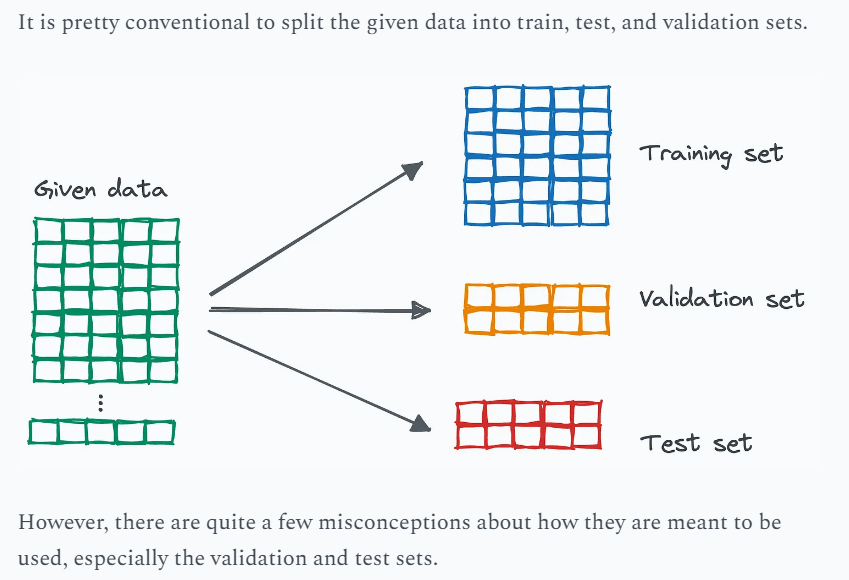

In [47]:
Image('3_dataset_DDoDS.png') if IN_COLAB else display(Image(filename='3_dataset_DDoDS.png'))

Che percentuali sono consigliabili?

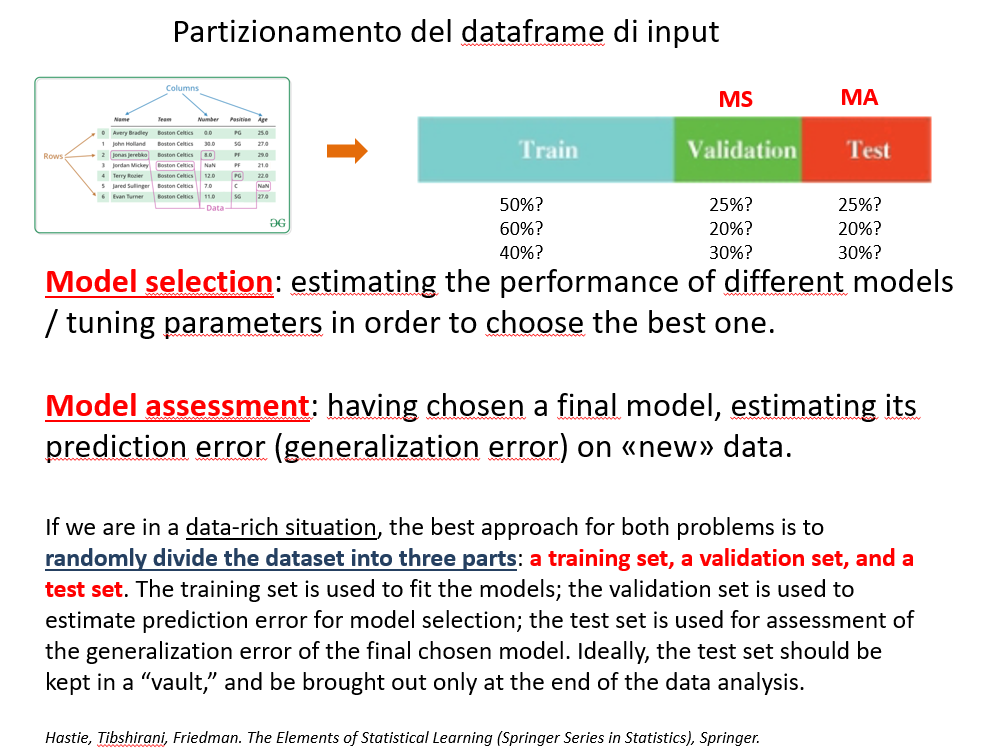

In [ ]:
Image('data_partitioning.png') if IN_COLAB else display(Image(filename='data_partitioning.png'))

Possiamo procedere secondo il  **classico schema di *scikit-learn***, cioè con la classe `train_test_split`, che è **una funzione multi-output** che crea **due dataset indipendenti**, impostando la percentuale di test (`test_size`), il seme (*random_state*) e la [stratificazione](https://it.wikipedia.org/wiki/Campionamento_stratificato) (`stratify=y`).

In [48]:
# ora lo split in training e test, tramite questa funzione MULTI-OUTPUT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=100, stratify=y)
                                                        # 'random state' (un numero QUALSIASI) è il seme che garantisce la RIPRODUCIBILITA'
                                                        # 'stratify=y' --> "data is split in a stratified fashion, using this as
                                                        #  the class labels.

In [49]:
X_train.head()

Age  Job  Credit amount  Duration  Sex_male  Housing_own  Housing_rent  \
883   65    0           1098        18     False         True         False   
943   42    1           1455         4      True         True         False   
451   29    2            518         6     False         True         False   
311   25    2           5511        24      True         True         False   
677   24    2           5595        72      True         True         False   

     Saving accounts_moderate  Saving accounts_quite rich  \
883                     False                       False   
943                     False                       False   
451                     False                       False   
311                      True                       False   
677                      True                       False   

     Saving accounts_rich  Checking account_moderate  Checking account_rich  \
883                 False                      False                  False   
943                 False                      False                  False   
451                 False                      False                  False   
311                 False                      False                  False   
677                 False                       True                  False   

     Purpose_car  Purpose_domestic appliances  Purpose_education  \
883        False                        False              False   
943         True                        False              False   
451        False                        False              False   
311        False                        False              False   
677        False                        False              False   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
883                        False              True            False   
943                        False             False            False   
451                        False              True            False   
311                         True             False            False   
677                        False              True            False   

     Purpose_vacation/others  
883                    False  
943                    False  
451                    False  
311                    False  
677                    False

> La percentuale di test tipicamente oscilla da un 20% ad un 50% massimo, con 25-30% valori più tipici.<br>
> Comunque si scelga questa percentuale, rimane il trade-off intrinseco: cioè vorremmo avere il maggior numero possibile di righe di training ed anche il maggior numero possibile di righe di test. La coperta è corta; questo problema è risolvibile  solo con la tecnica della **Cross-Validazione**.

Per il **campionamento stratificato** vedi [questa voce Wikipedia](https://it.wikipedia.org/wiki/Campionamento_stratificato) e [questo post stackoverflow](https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn).

Prima di procedere verifichiamo che la funzione *train_test_split* abbia fatto il suo dovere:

In [50]:
# il data type degli output della funzione:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
# le dimensioni degli output della funzione:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 19)
(750,)
(250, 19)
(250,)


**Breve recap**:<br>
Cioè, abbiamo suddiviso e rinominato il nostro dataset iniziale `df_credit` (1000 righe, 20 colonne):
- abbiamo suddiviso per colonna: i 19 *predictors* e la colonna *outcome*
- abbiamo dummizzato le colonne predittore categoriche
- abbiamo rinominato predittori e outcome in `X` e `y`
- abbiamo suddiviso per riga: il dataset di test (25% delle righe di X e degli elementi di y) ed il resto, che rimane come training dataset.

Ovviamente la funzione *train_test_split* ha campionato `X` ed `y` in modo **consistente**, cioè **stessi *row-id*** e stratificazione, come si può apprezzare dalle tre celle seguenti:

In [51]:
# stessi row-id per X e y
display(X_test.head())
display(y_test.head())

Age  Job  Credit amount  Duration  Sex_male  Housing_own  Housing_rent  \
254   24    2           2030         9      True         True         False   
875   40    2           1322        11     False         True         False   
327   34    2           1525        24     False         True         False   
278   32    2           4611         6     False         True         False   
738   45    3           6761         6      True         True         False   

     Saving accounts_moderate  Saving accounts_quite rich  \
254                     False                       False   
875                     False                       False   
327                     False                       False   
278                     False                       False   
738                     False                       False   

     Saving accounts_rich  Checking account_moderate  Checking account_rich  \
254                 False                       True                  False   
875                  True                       True                  False   
327                  True                      False                  False   
278                 False                      False                  False   
738                 False                      False                  False   

     Purpose_car  Purpose_domestic appliances  Purpose_education  \
254        False                        False              False   
875         True                        False              False   
327         True                        False              False   
278        False                        False              False   
738         True                        False              False   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
254                         True             False            False   
875                        False             False            False   
327                        False             False            False   
278                         True             False            False   
738                        False             False            False   

     Purpose_vacation/others  
254                    False  
875                    False  
327                    False  
278                    False  
738                    False

254    good
875    good
327    good
278     bad
738    good
Name: Risk, dtype: object

La funzione `train_test_split` ha rispettato anche le proporzioni di `good` e `bad`.

In [52]:
y_train.value_counts()  # la proporzione è rispettata, perchè: 225/750 = 300/1000 = 0.3

Risk
good    525
bad     225
Name: count, dtype: int64

In [ ]:
y_test.value_counts()  # la proporzione è rispettata, perchè: 75/250 = 0.3

Risk
good    175
bad      75
Name: count, dtype: int64

Il dataframe `X` non è standardizzato. La standardizzazione dei predittori quantitativi è necessaria solo con alcuni algoritmi, in particolare quelli che usano la nozione di **distanza** tra i vettori. Abbiamo comunque visto come realizzarla prima (con la classe `StandardScaler`), per calcolare il numero di condizionamento di $\mathbf{X}$.

# Data Leakage
Vedi newsletter DDoDS del 10.02.2026:<br>
La standardizzazione deve essere fatta DOPO lo split train/test!!


In [8]:
# Image('data_leakage_safeness.png') if IN_COLAB else display(Image(filename='data_leakage_safeness.png'))

# Il fit

**Le relazioni tra dati, algoritmo e modello**.<br>
Come visto nella slide di un precedente capitolo:<br>
Applicando (*fit* = letter. "adattamento") <u>l'algoritmo</u> scelto, ad esempio l'albero decisionale o la rete neurale, ai <u>dati</u> scelti (ad es. *german_credit_data*) si ottiene un <u>modello</u>. Quindi:
> **il modello è l'output del fit**.<br>

Il modello può essere una equazione matematica (più o meno complessa), una rete neurale a vari livelli, un albero, ecc.

👉 Il fit può essere **lineare o non-lineare**.<br>
I modelli <u>lineari</u> come la Regressione, la Regressione Logistica, SVM, ecc fanno un <u>fit lineare</u>, per prevedere (approssimare) una risposta continua. I modelli <u>non lineari</u>, come il KNN o le reti neurali, fanno un <u>fit non lineare</u>, per separare lo spazio di decisione, tramite un Decision Boundary.

Interpretazione geometrica diversa:
* regressione → si “adatta” una superficie
* classificazione → si “taglia” lo spazio con una frontiera




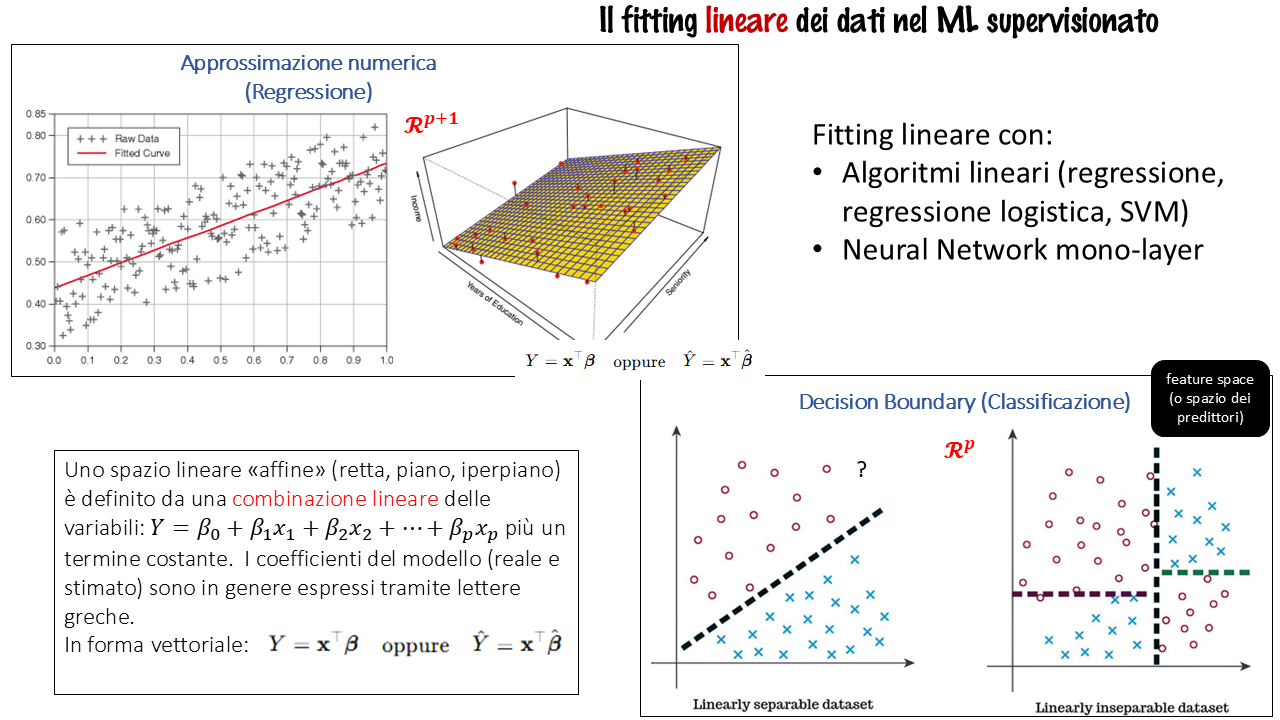

In [ ]:
Image('fitting_lineare.png') if IN_COLAB else display(Image(filename='fitting_lineare.png'))

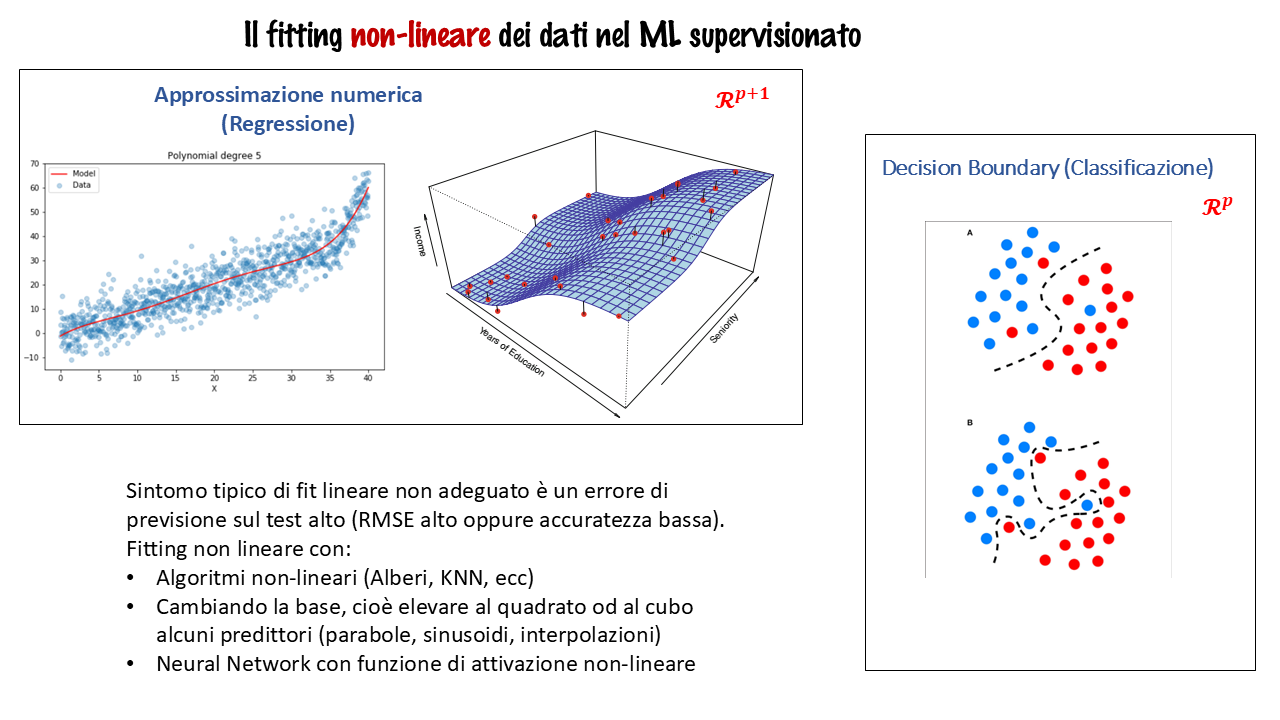

In [ ]:
Image('fitting_non_lineare.png') if IN_COLAB else display(Image(filename='fitting_non_lineare.png'))

👉 Entrambi i fit, sia per la regressione che la classificazione, avvengono in $\mathbb{R}^p$. Per quanto riguarda lo **spazio di rappresentazione grafica**, per la regressione esso è $\mathbb{R}^{p+1}$, cioè $(x, y) = (x_1, \dots, x_p, y)$.


# Il fit neurale su `german_credit_data`
Useremo TensorFlow.

Il  teorema dell'[approssimazione universale](https://en.wikipedia.org/wiki/Universal_approximation_theorem), da non confondere con il teorema di interpolazione polinomiale per il  esiste uno e un solo polinomio di grado *n* che può interpolare perfettamente n punti.

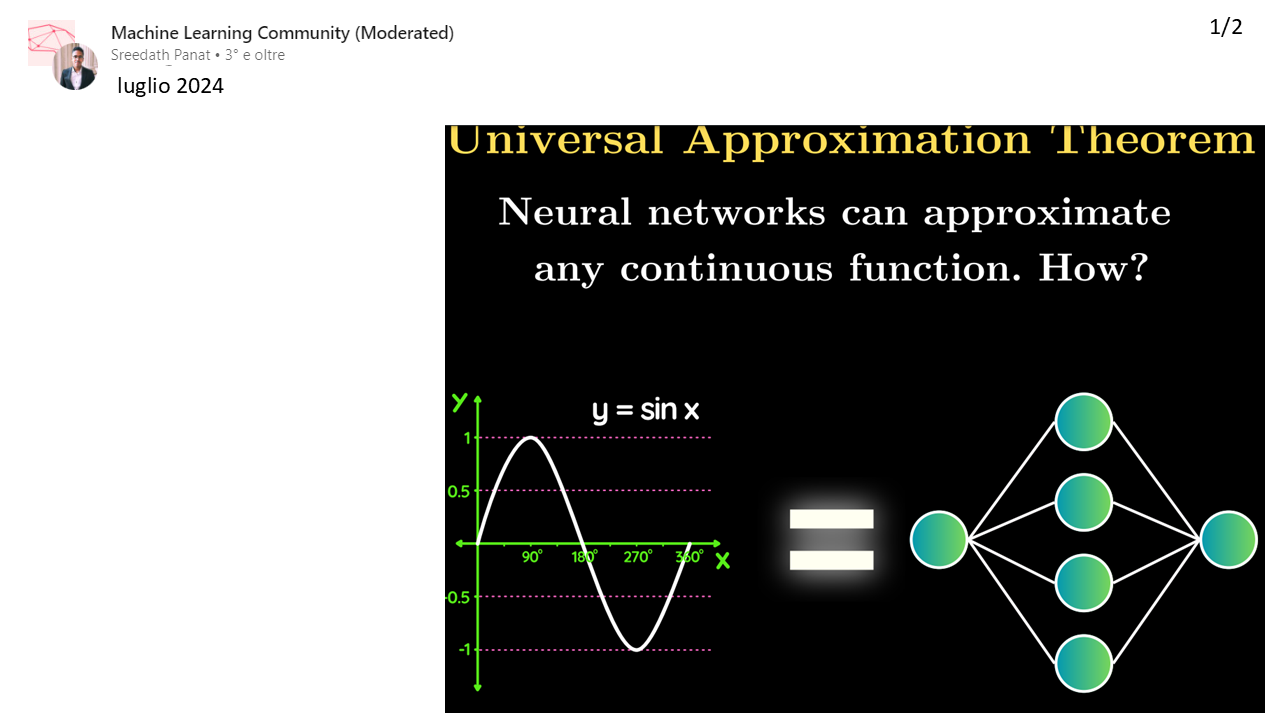

In [53]:
Image('teorema_approssimazione_1.png') if IN_COLAB else display(Image(filename='teorema_approssimazione_1.png'))

Caliamo questi algoritmi nel **contesto concreto del rischio di mercato**.<br>

Problemi di **classificazione** (la variabile target è discreat: un  evento sì/no, oppure una categoria):
* **superamento del VaR** (*VaR breach prediction*)
  - obiettivo: prevedere se domani la perdita supererà il VaR oppure no
  - risposta (aka, target o outcome): $y$ che vale 1 se perdita > VaR, 0 altrimenti
    - predittori / feature: rendimenti recenti, volatilità, correlazioni tra asset, indicatori marco, ec
    - modelli: tradizionali (regressione logistica, random forest) oppure reti neurali
* **regime di mercato (calmo o turbolento)**:
  - obiettivo: classificare il contesto di mercato
  - risposta: regime normale (0), stress/crisi (1)
  - predittori: volatilità, spread creditizi, liquidità, ecc
  - utile per: allocare capitale, stress test
* **classificazione della direzione del rischio**
  - obiettivo: capire se il rischio di portafoglio sta aumentando
  - risposta: 3 categorie: aumento rischio (0), stabile (1), diminuzione (2)
  - predittori: ecc

Problemi di **regressione**:
* **stima del VaR**
  - obiettivo: stimare direttamente il VaR del portafoglio
  - risposta: VaR numerico (continuo)
  - predittori: prezzi e rendimenti storici, volatilità GARCH, fattori di rischio (tassi, equity, FX)
  - modelli: regressione lineare, random forest, reti neurali, XGBoost
  - alternativa ai modelli parametrici (analitici)/storici/simulazioni ??
* **Stima della ES**
  - più interessante del VaR (dal punto di vista del ML/DL): non lineare e dipende dalle code della distribuzione
  - ML/DL può rilevare assimmetrie nella distribuzione dei dati, dipendenze non-lineari, clustering della volatilità (ML non supervisionato)
* **Previsione della volatilità futura**
  - risposta: $\sigma_{t+1}$
  - predittori: rendimenti passati, indicatori macro, volumi implicati
  - sosistuire / integrare modelli GARCH
* **Stima della perdita giornaliera di portafoglio**
  - risposta: P&L futuro
  - predittori: esposizioni, fattori di rischio, correlazioni

--> Queste tecniche possono arricchire la vostra cassetta degli attrezzi (algoritmi)

Si procede in modo **oggettivo**: si parte da un benchmark tradizionale (i vostri consueti algoritmi) e si verica, in base a delle metriche oggettive, se **sul vostro dataset** gli algoritmi di ML, e segnatamente di DL (reti neurali) migliorano queste metriche.

ML/DL sono attività di ricerca, di prova ed errore. Nessuno sa a priori se gli algoritmi di ML/DL, applicati al vostro problema predittivo ed al vostro dataset, forniranno metriche predittive migliori.


# Il processo generativo dei dati

Osservando un dataset viene naturale chiederci quale sia il processo generativo dei dati sottostante, **in genere appunto non noto** (a meno che i dati non siano simulati con un processo definito esplicitamente da noi o da qualcuno, come in quetso caso!).<br>

Il processo generativo dei dati ha sempre due componenti: il **"segnale"** (la parte sistematica) e il "**rumore**" (il caso e/o il lack-of-fit). Sono termini sistematizzati negli anni '40 del secolo scorso da [Claude Shannon](https://it.wikipedia.org/wiki/Claude_Shannon) nell'ambito della teoria delle tele-comunicazioni.

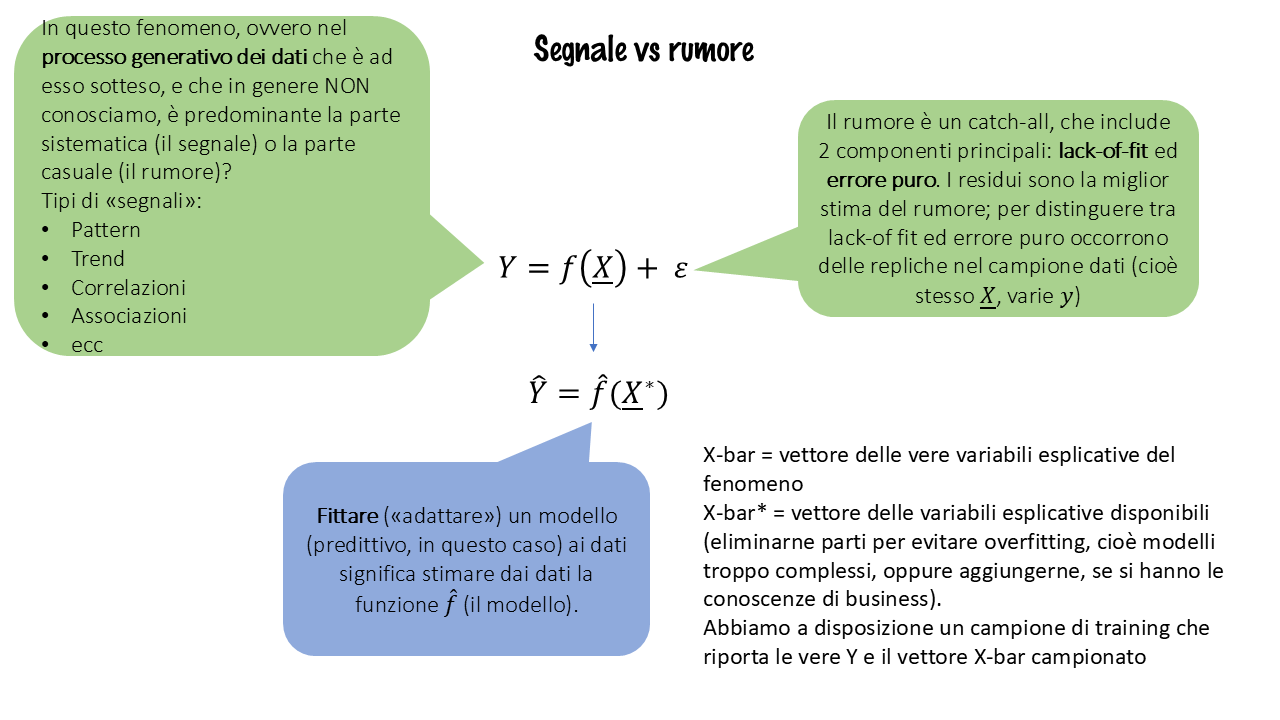

In [ ]:
Image('segnale_vs_rumore.png') if IN_COLAB else display(Image(filename='segnale_vs_rumore.png'))

---
A parità di algoritmo e di specificazione del modello, un rapporto segnale/rumore più alto rende il problema di stima generalmente più semplice e stabile; un segnale debole rispetto al rumore rende invece più difficile identificare la struttura del fenomeno e aumenta il rischio di errore e overfitting.

---